In [1]:
import codebase.web_scrape_functions as wsf
import codebase.analysis_functions as af
from codebase.match_data import MatchData
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import utils
from utils import logger, DATA_LOCATION
import os
import logging
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import codebase.graphing_functions as gf
from codebase.settings import CAREERS
import re
import json


%load_ext autoreload
%autoreload 2
logger.handlers[1].setLevel(logging.INFO)
# logger.disabled = True
pd.get_option("display.max_columns")

if utils.check_if_ipython():
    logger.disabled = True

d:\Documents\Cricket\data_analysis\cricket_analytics\data\cricket_data.db


In [2]:
KOHLI_ID = '253802'
ROOT_PLAYER_ID = '303669'
WILLIAMSON_PLAYER_ID = '277906'
SPD_SMITH_ID = '267192'

In [3]:
test_match_list = wsf.get_player_match_list(KOHLI_ID, _format='test')
#test_match_list

In [4]:
test_match_list.index('1187685')

84

In [5]:
all_totals = af.get_cricket_totals(int(KOHLI_ID), matches=test_match_list, _type='bat', by_innings=True, is_object_id=True, try_local=False)

In [6]:
kohli_innings = af.get_player_contributions(int(KOHLI_ID), matches=test_match_list, _type='bat', by_innings=True, is_object_id=True)

In [ ]:
%%script false --no-raise-error
import math
dismissals = {}
for inning in all_totals:
    try:
        dismissals[inning['how_out']] += 1
    except KeyError:
        dismissals[inning['how_out']] = 1

In [ ]:
# Breakdown of dismissals, we want to see sum how Kohli has got out over time and graph this.
# Need to make individuals 'lines' for each dismissal type. Lets just first start with getting Kohli's test innings and then summing dismissals.
#%%script false --no-raise-error
match_list = wsf.get_player_match_list(KOHLI_ID)
bad_forma_matches = match_list[84:]


In [ ]:
%%script false --no-raise-error
contributions = []
for match_id in test_match_list:
    match = match_data.MatchData(match_id)
    contribution = af._cricket_totals(PLAYER_ID, match, _type='bat', by_innings=True, is_object_id=True)
    for i,inning in enumerate(contribution['bat']):
        contributions.append({**inning, **{key:contribution[key] for key in contribution.keys() if key not in ['bat', 'bowl']}, **{'inning': i}})

contributions[-5:]

In [ ]:
#innings = [inning for match in contributions for inning in match]
#innings[:5]

In [ ]:
%%script false --no-raise-error
innings_df = pd.DataFrame(contributions)
innings_df.head()
innings_df.shape

Now we will try to graph the running average on this graph. 

In [ ]:
%%script false --no-raise-error
running_average = []

total_runs = 0
out = 0

for i,innings in enumerate(zip(innings_df.runs, innings_df.not_out)):
    total_runs += innings[0]
    if innings[1] == False:
        out += 1
    try:
        running_average.append(round(total_runs/out,2))
    except ZeroDivisionError:
        running_average.append(None)

running_average

We now can map the average of the last X innings, this is the 'form guide'

In [ ]:
%%script false --no-raise-error
last_x_average = []

window_runs = 0
window_out = 0

#moving window of length x

window_size = 12

for i,innings in enumerate(zip(innings_df.runs, innings_df.not_out)):
    if i>=window_size:
        window_runs -= innings_df.runs.iloc[i-window_size]
        if innings_df.not_out.iloc[i-window_size] == False:
            window_out -= 1
    
    window_runs += innings[0]
    if innings[1] == False:
        window_out += 1
    try:
        last_x_average.append(round(window_runs/window_out,2))
    except ZeroDivisionError:
        last_x_average.append(None)

last_x_average

In [ ]:
%%script false --no-raise-error
y_range = [0, max(innings_df.runs) + 20]

fig, ax1 = plt.subplots(figsize=(18,10))
#sns.set_theme()
sns.lineplot(data = {'Average': running_average, f'Last {window_size} Innings': last_x_average}, sort = False, ax=ax1, palette='rocket')

ax1.set_ylim(y_range)

ax2 = ax1.twinx()

sns.barplot(data = innings_df, x=innings_df.index, y=innings_df.runs, alpha=0.5, ax=ax2, hue=innings_df.continent, palette='mako', dodge=False)
ax2.set_ylim(y_range)

In [ ]:
%%script false --no-raise-error
SPD_SMITH_TEST_MATCHES = wsf.player_match_list(SPD_SMITH_ID)
spd_smith_contributions = af.get_cricket_totals(SPD_SMITH_ID, SPD_SMITH_TEST_MATCHES, 'bat', True, True)

In [ ]:
%%script false --no-raise-error
# spd_smith_contributions[-5:]

In [ ]:
%%script false --no-raise-error
spd_innings = pd.DataFrame(spd_smith_contributions)
spd_innings.tail()

In [ ]:
%%script false --no-raise-error
spd_ave = af.get_running_average(SPD_SMITH_ID)
spd_recent_form = af.get_recent_form_average(SPD_SMITH_ID, window_size=12)

In [ ]:
%%script false --no-raise-error
y_range = [0, max(spd_innings.runs) + 20]

fig, ax1 = plt.subplots(figsize=(18,10))
#sns.set_theme()
sns.lineplot(data = {'Average': spd_ave, f'Last {window_size} Innings': spd_recent_form}, sort = False, ax=ax1, palette='rocket')

ax1.set_ylim(y_range)

ax2 = ax1.twinx()

sns.barplot(data = innings_df, x=spd_innings.index, y=spd_innings.runs, alpha=0.5, ax=ax2, hue=spd_innings.continent, palette='mako', dodge=False)
ax2.set_ylim(y_range)

In [ ]:
%%script false --no-raise-error
contributions = af.get_player_contributions(PLAYER_ID, test_match_list, 'bat', False, True)

In [ ]:
%%script false --no-raise-error
contributions[-5:]

In [ ]:
%%script false --no-raise-error
innings = af.get_cricket_totals(PLAYER_ID, test_match_list, 'bat', True, True)
innings[-5:]

In [ ]:
#Williamson
#af.get_career_batting_graph(277906)

In [ ]:
#Root
#af.get_career_batting_graph(303669)

In [ ]:
#Smith
# af.get_career_batting_graph(SPD_SMITH_ID)

In [ ]:
#Kohli
# af.get_career_batting_graph(PLAYER_ID, dates='2017-01-01:')

In [ ]:
#Cook
gf.get_career_batting_graph(11728, player_age='27:33')

In [ ]:
%%script false --no-raise-error

sns.set_theme()
innings_df.head()

In [ ]:
%%script false --no-raise-error
fig_dims = (15,10)
fig,ax = plt.subplots(figsize=fig_dims);
bar = sns.barplot(innings_df.index, innings_df.runs, palette='mako');
x_dates = innings_df.date.dt.strftime('%d-%m-%Y')
bar.set_xticklabels(labels=x_dates, rotation=90);

_ = plt.setp(ax.patches, linewidth=0)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [ ]:
%%script false --no-raise-error
top_players = wsf.read_statsguru('https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=batting_average;qualmin1=30;qualval1=matches;template=results;type=batting', table_name='Overall figures')


In [ ]:
%%script false --no-raise-error
top_players = pd.DataFrame(top_players[0])

In [ ]:
%%script false --no-raise-error
all_dismissals

In [ ]:
%%script false --no-raise-error
count = 0
for dismissal in all_dismissals:
    for word in ['drive', 'cover', 'defending', 'defence', 'outside']:
        if word in dismissal[0].lower():
            if 'run out' not in dismissal[1].lower():
                print(dismissal[0])
                print()
                count += 1
                break

print(f'Dismissals that include key-words: {count}')
print(f'Dismissals that include key-words: {count/len(all_dismissals)}')

In [ ]:
%%script false --no-raise-error
len(all_dismissals)

In [ ]:
%%script false --no-raise-error
comms_pre_slump = af.get_player_contributions(KOHLI_ID, match_list[:84], 'bat', True, True)
all_every_dismissals = []
for match in comms_pre_slump:
    comms = match.iloc[-1]
    
    if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
        #print(comms.dismissalText)
        all_every_dismissals.append((comms.commentTextItems, comms.dismissalText))
    else:
        print(comms.commentTextItems)

every_count = 0
for dismissal in all_every_dismissals:
    for word in ['drive', 'cover', 'defending', 'defence', 'outside']:
        if word in dismissal[0].lower():
            if 'run out' not in dismissal[1].lower():
                print(dismissal[0])
                print()
                every_count += 1
                break

print(f'Dismissals that include key-words: {every_count}')
print(f'Dismissals that include key-words: {every_count/len(all_every_dismissals)}')

In [ ]:
%%script false --no-raise-error
def search_for_keywords(text_items, keywords = [], exclude_words = [], return_matching = False):
    count = 0
    matching = []
    for text in text_items:
        for word in keywords:
            if word in text.lower():
                exclude = False
                for e_word in exclude_words:
                    if e_word in text.lower():
                        exclude = True
                        break
                if exclude:
                    break
                count += 1
                matching.append(text)
                break
    if return_matching:
        return count, matching
    return count

In [ ]:
%%script false --no-raise-error
all_dismissals = [dismissal[0] + ', ' + dismissal[1] for dismissal in all_dismissals]

In [ ]:
%%script false --no-raise-error
count, matching = search_for_keywords(all_dismissals, ['drive', 'cover', 'defending', 'defence', 'outside'], exclude_words=['run out'], return_matching=True)

In [ ]:
%%script false --no-raise-error
count_oe, matching_oe = search_for_keywords(all_dismissals, ['outside off', 'outside edge', 'cover drive', 'drive'], exclude_words=['inside', 'run out'], return_matching=True)

In [ ]:
%%script false --no-raise-error
def get_dismissal_descriptions(commentary):
    all_dismissals = []
    for match in commentary:
        comms = match.iloc[-1]
        
        if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
            #print(comms.dismissalText)
            all_dismissals.append((comms.commentTextItems, comms.dismissalText))
        #else:
            #print(comms.commentTextItems)
    return all_dismissals

In [ ]:
%%script false --no-raise-error
top_players.Player = [wsf.player_id_from_link(player, playername=False)[1] for player in top_players.Player]

In [ ]:
%%script false --no-raise-error
top_players[top_players.Player == '267192']

In [ ]:
%%script false --no-raise-error
match_list = []
for player in top_players.Player:
    match_list += wsf.player_match_list(player)

In [ ]:
# set([int(id) for id in match_list])

In [ ]:
# len(match_list)

In [ ]:
%%script false --no-raise-error
recent_form = {}
for player in [PLAYER_ID, SPD_SMITH_ID, ROOT_PLAYER_ID, WILLIAMSON_PLAYER_ID]:
    player_match_list = wsf.player_match_list(player)
    player_innings_df = af.get_cricket_totals(player, player_match_list, _type='bat', by_innings=True, is_object_id=True)
    player_innings_df = pd.DataFrame(player_innings_df)
    recent_form[player] = af.calculate_recent_form_average(player_innings_df)

In [ ]:
%%script false --no-raise-error
top_players.Player

In [ ]:
%%script false --no-raise-error
all_recent_form = utils.load_data('all_recent_form','dict',file_ext='p')

In [ ]:
%%script false --no-raise-error
all_running_ave  = utils.load_data('all_running_ave','dict',file_ext='p')

In [ ]:
%%script false --no-raise-error
all_running_ave.keys()

In [ ]:
%%script false --no-raise-error
problem_players = []
for player in all_recent_form:
    try:
        [int(x) for x in all_recent_form[player]]
    except (ValueError, TypeError):
        problem_players.append(player)

problem_players
        

In [ ]:
%%script false --no-raise-error
full_df = af.normalized_career_length(all_recent_form)

In [ ]:
%%script false --no-raise-error
import math
dismissals = {}
for inning in all_totals:
    try:
        dismissals[inning['how_out']] += 1
    except KeyError:
        dismissals[inning['how_out']] = 1

In [ ]:
%%script false --no-raise-error
test = [{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'},{'how_out':'caught'}]

In [ ]:
%%script false --no-raise-error
dismissal_histories = {}
for i, inning in enumerate(all_totals):
    try:
        dismissal_histories[inning['how_out']] += [dismissal_histories[inning['how_out']][-1]+1]
    except KeyError:
        dismissal_histories[inning['how_out']] = [0]*(i) + [1]        
    for d in dismissal_histories:
        if d != inning['how_out']:
            dismissal_histories[d] += [dismissal_histories[d][-1]]

In [ ]:
%%script false --no-raise-error
fig, ax1 = plt.subplots(figsize=(18,10)) 
sns.lineplot(data = dismissal_histories, ax=ax1, sort = False, palette='rocket', linewidth=2)

In [ ]:
%%script false --no-raise-error
gf.get_career_batting_graph(KOHLI_ID)

In [ ]:
%%script false --no-raise-error
def graph_dismissals(player_id, match_list = None, dates = None):
    if not match_list:
        match_list = wsf.player_match_list(player_id, dates=dates)
    all_totals = af.get_cricket_totals(player_id, matches=match_list, _type='bat', by_innings=True, is_object_id=True)
    dismissal_histories = {}
    for i, inning in enumerate(all_totals):
        try:
            dismissal_histories[inning['how_out']] += [dismissal_histories[inning['how_out']][-1]+1]
        except KeyError:
            dismissal_histories[inning['how_out']] = [0]*(i) + [1]        
        for d in dismissal_histories:
            if d != inning['how_out']:
                dismissal_histories[d] += [dismissal_histories[d][-1]]
    
    fig, ax1 = plt.subplots(figsize=(18,10)) 
    sns.lineplot(data = dismissal_histories, ax=ax1, sort = False, palette='rocket', linewidth=2)

In [ ]:
%%script false --no-raise-error
graph_dismissals(KOHLI_ID, match_list=match_list[-23:])

In [ ]:
%%script false --no-raise-error
gf.get_career_batting_graph(KOHLI_ID, dates='2020-02-21:')

In [ ]:
# Lets see the text of Virat Kohli's actually dismissals. So get matches, get the comms from the matches and then pull the commentary text from there. 

In [ ]:
#%%script false --no-raise-error
# Lets only analyse Kohli's recent "bad form"
kohli_bad_form_comms = af.get_player_contributions(KOHLI_ID, bad_forma_matches, 'bat', True, True)

In [ ]:
len(kohli_bad_form_comms)

In [ ]:
%%script false --no-raise-error
all_dismissals = []
for match in kohli_bad_form_comms:
    comms = match.iloc[-1]
    
    if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
        print(comms.dismissalText)
        all_dismissals.append((comms.commentTextItems, comms.dismissalText))
    else:
        print(comms.commentTextItems)

In [ ]:
%%script false --no-raise-error
count = 0
for dismissal in all_dismissals:
    for word in ['drive', 'cover', 'defending', 'defence', 'outside']:
        if word in dismissal[0].lower():
            if 'run out' not in dismissal[1].lower():
                print(dismissal[0])
                print()
                count += 1
                break

print(f'Dismissals that include key-words: {count}')
print(f'Dismissals that include key-words: {count/len(all_dismissals)}')

In [ ]:
%%script false --no-raise-error
comms_pre_slump = af.get_player_contributions(KOHLI_ID, match_list[:84], 'bat', True, True)
all_every_dismissals = []
for match in comms_pre_slump:
    comms = match.iloc[-1]
    
    if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
        #print(comms.dismissalText)
        all_every_dismissals.append((comms.commentTextItems, comms.dismissalText))
    else:
        print(comms.commentTextItems)

every_count = 0
for dismissal in all_every_dismissals:
    for word in ['drive', 'cover', 'defending', 'defence', 'outside']:
        if word in dismissal[0].lower():
            if 'run out' not in dismissal[1].lower():
                print(dismissal[0])
                print()
                every_count += 1
                break

print(f'Dismissals that include key-words: {every_count}')
print(f'Dismissals that include key-words: {every_count/len(all_every_dismissals)}')

In [ ]:
%%script false --no-raise-error
def search_for_keywords(text_items, keywords = [], exclude_words = [], return_matching = False):
    count = 0
    matching = []
    for text in text_items:
        for word in keywords:
            if word in text.lower():
                exclude = False
                for e_word in exclude_words:
                    if e_word in text.lower():
                        exclude = True
                        break
                if exclude:
                    break
                count += 1
                matching.append(text)
                break
    if return_matching:
        return count, matching
    return count

In [ ]:
%%script false --no-raise-error
all_dismissals = [dismissal[0] + ', ' + dismissal[1] for dismissal in all_dismissals]

In [ ]:
%%script false --no-raise-error
count, matching = search_for_keywords(all_dismissals, ['drive', 'cover', 'defending', 'defence', 'outside'], exclude_words=['run out'], return_matching=True)

In [ ]:
%%script false --no-raise-error
count_oe, matching_oe = search_for_keywords(all_dismissals, ['outside off', 'outside edge', 'cover drive', 'drive'], exclude_words=['inside', 'run out'], return_matching=True)

In [ ]:
%%script false --no-raise-error
def get_dismissal_descriptions(commentary):
    all_dismissals = []
    for match in commentary:
        comms = match.iloc[-1]
        
        if comms.dismissalText not in [None, 'null', 'NaN', 'None']:
            #print(comms.dismissalText)
            all_dismissals.append((comms.commentTextItems, comms.dismissalText))
        #else:
            #print(comms.commentTextItems)
    return all_dismissals

## Fab4 comms full and after Kohli slump

In [ ]:
%%script false --no-raise-error
top_four_comms = {}
for player in ['253802', 303669, 277906, 267192]:
    inning = utils.load_data(player, 'career_innings_stats', data_folder=CAREERS)
    innings_df = pd.read_json(inning)
    top_four_comms[player] = innings_df

In [ ]:
%%script false --no-raise-error
top_four_stats = af.apply_aggregate_func_to_list(['253802', '303669', '277906', '267192'], [af.calculate_recent_form_average, af.calculate_running_average], dates='2020-02-21:', disable_logging=False)

In [ ]:
%%script false --no-raise-error
top_four_comms = {}
for player in ['253802', '303669', '277906', '267192']:
    inning = utils.load_data(player, 'career_innings_stats', data_folder=CAREERS)
    innings_df = pd.read_json(inning)
    top_four_comms[player] = innings_df[innings_df.date >= '2020-02-21']

In [ ]:
%%script false --no-raise-error
gf.graph_career_batting_summary(top_four_stats['calculate_recent_form_average'], top_four_stats['calculate_running_average'], top_four_comms)

## Searching for drives played in Fab4

In [ ]:
%%script false --no-raise-error
results = []
for player in ['253802', '303669', '277906', '267192']:
    matches = wsf.player_match_list(player)
    player_contr = af.get_player_contributions(player, matches=matches, _type='bat', by_innings=True, is_object_id=True)
    dismissals = get_dismissal_descriptions(player_contr)
    dismissals = [dismissal[0] + ', ' + dismissal[1] for dismissal in dismissals]
    count, matching = search_for_keywords(dismissals, ['drive', 'cover', 'defending', 'defence', 'outside'], exclude_words=['run out'], return_matching=True)
    count_oe, matching_oe = search_for_keywords(dismissals, ['outside off', 'outside edge', 'cover drive', 'drive'], exclude_words=['inside', 'run out'], return_matching=True)
    results.append((count, count_oe, len(dismissals)))
    # results.append(count_oe)
    # results.append(f"For player {player}, there were {count}/{len(dismissals)} that include the specified key-words: {['drive', 'cover', 'defending', 'defence', 'outside']}")
    # results.append(f"For player {player}, there were {count_oe}/{len(dismissals)} that include the specified key-words: {['outside off', 'outside edge', 'cover drive', 'drive']} ")

for result in results:
    print(f"For player {player}, there were {result[0]}/{result[2]} that include the specified key-words: {['drive', 'cover', 'defending', 'defence', 'outside']}")
    print(f"For player {player}, there were {result[1]}/{result[2]} that include the specified key-words: {['outside off', 'outside edge', 'cover drive', 'drive']} ")
    

In [ ]:
%%script false --no-raise-error
for result in results:
    for i in [0,1]:
        print(result[i]/result[2])

## Graphing Careers of Fab4 and top 50 test players

In [ ]:
top_players = [KOHLI_ID, SPD_SMITH_ID, ROOT_PLAYER_ID, WILLIAMSON_PLAYER_ID]
gf.graph_multi_player_batting_careers(top_players, dates ="2020-02-21:")

In [ ]:
gf.graph_multi_player_batting_careers(top_players, dates ="2020-02-21:")

### Graphing careers of top indian players

In [ ]:
%%script false --no-raise-error
top_indians_table = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=batting_average;qualmin1=20;qualval1=matches;team=6;template=results;type=batting"
top_indians = wsf.read_statsguru(top_indians_table, table_name='Overall figures')

In [ ]:
%%script false --no-raise-error
top_indians = top_indians[0]
top_indians.Player = [wsf.player_id_from_link(val, playername=False)[1] for val in top_indians.Player]

In [ ]:
%%script false --no-raise-error
top_20_indians = [player for player in top_indians.Player[:20]]

In [ ]:
%%script false --no-raise-error
gf.graph_multi_player_batting_careers(top_20_indians)

In [ ]:
%%script false --no-raise-error
all_recent_form_indians  = utils.load_data('all_recent_form_indians','dict',file_ext='p')
all_innings_indians  = utils.load_data('all_running_ave_indians','dict',file_ext='p')


In [ ]:
%%script false --no-raise-error
all_running_ave_indians = {}
for player in all_innings_indians:
    all_running_ave_indians[player] = af.calculate_running_average(all_innings_indians[player])

In [ ]:
%%script false --no-raise-error
gf.graph_career_batting_summary(all_recent_form_indians, all_running_ave_indians, all_innings_indians)

### Searching again for drives played in Fab4

In [ ]:
%%script false --no-raise-error
results = []
for player in ['253802', '303669', '277906', '267192']:
    matches = wsf.player_match_list(player)
    player_contr = af.get_player_contributions(player, matches=matches, _type='bat', by_innings=True, is_object_id=True)
    dismissals = get_dismissal_descriptions(player_contr)
    dismissals = [dismissal[0] + ', ' + dismissal[1] for dismissal in dismissals]
    count, matching = search_for_keywords(dismissals, ['drive', 'cover', 'defending', 'defence', 'outside'], exclude_words=['run out'], return_matching=True)
    count_oe, matching_oe = search_for_keywords(dismissals, ['outside off', 'outside edge', 'cover drive', 'drive'], exclude_words=['inside', 'run out'], return_matching=True)
    results.append((count, count_oe, len(dismissals)))
    # results.append(count_oe)
    # results.append(f"For player {player}, there were {count}/{len(dismissals)} that include the specified key-words: {['drive', 'cover', 'defending', 'defence', 'outside']}")
    # results.append(f"For player {player}, there were {count_oe}/{len(dismissals)} that include the specified key-words: {['outside off', 'outside edge', 'cover drive', 'drive']} ")

for result in results:
    print(f"For player {player}, there were {result[0]}/{result[2]} that include the specified key-words: {['drive', 'cover', 'defending', 'defence', 'outside']}")
    print(f"For player {player}, there were {result[1]}/{result[2]} that include the specified key-words: {['outside off', 'outside edge', 'cover drive', 'drive']} ")
    

In [ ]:
%%script false --no-raise-error
for result in results:
    for i in [0,1]:
        print(result[i]/result[2])

## Graphing Kohli Scores vs Inning Length

In [6]:
all_totals_df = pd.DataFrame(all_totals)

<AxesSubplot:xlabel='balls_faced', ylabel='runs'>

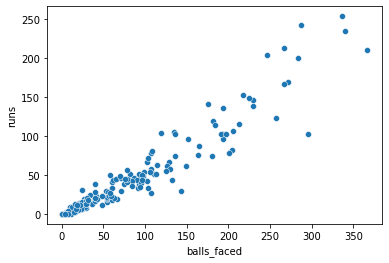

In [7]:
sns.scatterplot(all_totals_df.balls_faced, all_totals_df.runs)

What information can we get from the above graph? We can see a general trend that the longer that Kohli bats, the more runs he gets. This is expected.

The slope of this graph is Kohli's strike rate. It is slightly evident that as Kohli gets more comfortable at the crease, he tends to score quicker. But this is not that evident whith Kohli. Maybe with other batsman we can see this trend better.

This graph is not really very informative otherwise. We should try to graph how Kohli builds an innings. We want to see his strikerate as it progresses through an innings. As well as the type of shots he plays.


## Cumulative Strike Rate

Go through each inning comms, and calculate the strikerate after each ball. Then add this to a list that can be graphed.

In [ ]:
kohli_innings[0].columns

In [8]:
def cumulative_sr(inning_comms:pd.DataFrame):
    tot_runs = 0
    tot_balls = 0

    cum_sr = []

    for i, row in inning_comms.iterrows():
        tot_runs += row.batsmanRuns
        if not row.wides or not row.noballs:
            tot_balls += 1

        sr = tot_runs/tot_balls
        cum_sr.append(sr)
    
    return cum_sr

In [9]:
def average_elements_of_list(list_of_lists:list[list]):
    max_length = len(max(list_of_lists, key=lambda x: len(x)))

    averaged_list = []
    for i in range(max_length):
        element_tot = 0
        element_count = 0
        for _list in list_of_lists:
            try:
                element_tot += _list[i]
                element_count += 1
            except IndexError:
                pass
        
        averaged_list.append(element_tot/element_count)

    return averaged_list

In [12]:
cumulative_innings_sr = [cumulative_sr(inning) for inning in kohli_innings] #Here we get the cumulative strike rate of every innings in the total
cumulative_innings_sr_bad_form = [cumulative_sr(inning) for inning in kohli_innings[-32:]]

In [13]:
average_cumulative_sr = average_elements_of_list(cumulative_innings_sr) #Here we average the strikerate of every ball of the innings
average_cumulative_sr_bad_form = average_elements_of_list(cumulative_innings_sr_bad_form)

In [14]:
x = [i for i in range(len(average_cumulative_sr))]
average_cumulative_sr_bad_form += [None]*(len(average_cumulative_sr)-len(average_cumulative_sr_bad_form))
cumulative_srs = pd.DataFrame({
    'Balls':x,
    'Career':average_cumulative_sr,
    'Bad_Form':average_cumulative_sr_bad_form
})

<AxesSubplot:xlabel='Balls', ylabel='value'>

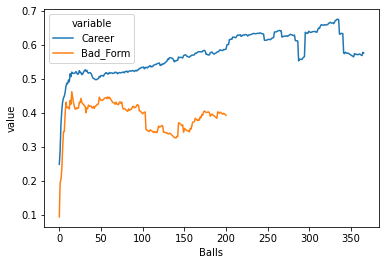

In [15]:

sns.lineplot(x='Balls', y='value', hue='variable', data=pd.melt(cumulative_srs, ['Balls']))

We can see that Kohli has been considerably less fluent over his bad form period. We can see that he is starting considerably slower than his average and also not gaining in fluency as he normally does. His strike rate actually decreaeses over time.

We want to do this analysis with every shot type as well, so that we can see if it is particular shots that are getting him out.

We also want to do a shot frequency analysis, when he is in prime form, what shots is he playing and when in his innings is he playing these shots. The hypothesis is that there will be a difference in shot selection between his good form and his poor form.

In [ ]:
#gf.get_career_batting_graph(KOHLI_ID)

In [ ]:
gf.get_career_batting_graph(KOHLI_ID, dates="08-10-2016:22-11-2019")

In [ ]:
good_form_matches = wsf.get_player_match_list(KOHLI_ID, dates="2016-10-08:2019-10-10")
good_form_totals = af.get_cricket_totals(KOHLI_ID, matches=good_form_matches, _type='bat', by_innings=True, is_object_id=True)

In [ ]:
good_form_totals

In [ ]:
ave, tots = af.aggregate_batting_analysis(good_form_totals[0:24])

In [ ]:
good_form_totals[23]

In [ ]:
ave

In [ ]:
tots

## Best period of form

Ok, we want to find Kohli's best period in tests. We will do this by calulating the average and run totals in each time period and then compare which period ends up being Kohli's best. First, lets determine what we want to consider as the minimum period. Lets say we think the minimum viable period is around series. Considering on average a series is 3 or so matches, we will consider the minimum period to be 5 innings.Any lower that this and its too small a sample size. Next let us consider the max period. This could be a long time. We frequently consider batsman that have good patches for 3-4 years at a time. Looking at Kohli however, we can say that 4 years looks a reasonable period to catch his longest period of good form.

min_period: 5
max_period 4 years, if Kohli playes 10 matches a year, that gives 80/90 as the longest period.

**How will we tackle this?**

What we will do is grab all matches first, to save time. Then we slice the matches by the time period we selected and then calculate the average and totals for each time period, we will store the results by beginning match index to index+period and then store this in a dict that will be organized by key being the period. Then finally can check what is the best average for each period.

In [45]:
def get_player_performances_in_periods(player_id, min_period, max_period = None, cricket_totals = None, _format='test', _type='bat', cricket_runs_ave=True):
    """
    Returns the player stats in time periods defined by the minimum to maximum period lengths
    Note: player_id is object_id
    If there is no max period, then the only the single minimum period value will be calculated

    Returns: dict of periodic stats
    {period:{start_inning:end_inning:{average:ave_dict, totals: tots_dict, innings: period_innings}}}
    """
    if not max_period:
        max_period = min_period + 1
    
    periodic_stats = {}
    if not cricket_totals:
        matches = wsf.get_player_match_list(player_id, _format=_format)
        cricket_totals = af.get_cricket_totals(player_id, matches, _type=_type, by_innings=True, is_object_id=True)

    for period in range(min_period, max_period):    
        periodic_stats[period] = {}

        for i in range(len(cricket_totals)-period + 1):

            period_match_totals = cricket_totals[i:(i+period)]
            period_ave, period_tot = af.aggregate_batting_analysis(period_match_totals, cricket_runs_ave=cricket_runs_ave)
            periodic_stats[period][f'{i}:{i+period}'] = {'averages':period_ave, 'totals':period_tot, 'innings': period_match_totals}
    
    return periodic_stats


In [ ]:
kohli_periodic_stats = get_player_performances_in_periods(KOHLI_ID, 5, 90, cricket_totals=all_totals)

In [ ]:
[kohli_periodic_stats[80][key]['averages']['runs'] for key in kohli_periodic_stats[80]]

In [ ]:
max_ave_in_periods = [max(kohli_periodic_stats[period], key=lambda x: kohli_periodic_stats[period][x]['averages']['runs']) for period in kohli_periodic_stats]

In [ ]:
max_ave_in_periods = [(kohli_periodic_stats[list(kohli_periodic_stats.keys())[i]][period]['averages']['runs'], period) for i,period in enumerate(max_ave_in_periods)]

In [ ]:
maip = [x for x in zip([key for key in kohli_periodic_stats], max_ave_in_periods)]

In [4]:
def get_best_periods(player_id, min_period=1, max_period=None, display_key=None, stat_type='averages', stat='runs', lowest=False, _format='test', _type='bat', periodic_stats=None):
    """
    Gets the best metric in each period in periodic stats. If periodic stats are provided then no period needs to be provided
    """
    if not periodic_stats:
        periodic_stats = get_player_performances_in_periods(player_id, min_period, max_period, _format=_format, _type=_type)

    agg_func = max
    if lowest:
        agg_func = min
    
    max_ave_in_periods = [max(periodic_stats[period], key=lambda x: periodic_stats[period][x][stat_type][stat]) for period in periodic_stats]
    max_ave_in_periods = [(periodic_stats[list(periodic_stats.keys())[i]][period][stat_type][stat], period) for i,period in enumerate(max_ave_in_periods)]
    return {x[0]:x[1] for x in zip([key for key in periodic_stats], max_ave_in_periods)}

We have the start and end inning of all the period, let us now graph them and we can see what if there is a distinctive period that was Kohli's best

In [ ]:
points = sorted([(int(x),int(val[0])) for val in maip for x in val[1][1].split(':')], key=lambda x: x[0])

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot([p[0] for p in points], [p[1] for p in points])

So now we have a good way of getting all the innings, and so let us now find the averages of players over their best 80 innings. Basically how this was done with Kohli was that his cricket totals were loaded, and then we ran the `get_best_period` function above and this basically fetched the best average of a period of length `x` for a particular player. So we will do this for all players with over 80 innings to have ever played.

In [3]:
#%%script false --no-raise-error
players_grabbed = []
logger.info("Grabbing all player ids with over 80 innings ot their name")
for page in range(1,8):
    logger.info("Processing page %s", page)
    url = f"https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=runs;page={page};qualmin1=80;qualval1=innings;template=results;type=batting"
    players_grabbed += wsf.read_statsguru(url, table_name='Overall figures')[0].Player.to_list()

logger.info("Isolating player IDs")
players = [re.match('/ci/content/player/(\d+)\.html', player[1])[1] for player in players_grabbed]

In [4]:
#%%script false --no-raise-error
best_80 = {}
for player in players:
    cricket_totals = af.get_cricket_totals(int(player), _type='bat', by_innings=True, try_local=True, is_object_id=True)
    period_stats = af.get_player_performances_in_periods(int(player), 80, cricket_totals=cricket_totals, cricket_runs_ave=False)
    #pprint([period_stats[80][period]['averages']['runs'] for period in period_stats[80]])
    best_period = get_best_periods(player, periodic_stats=period_stats)
    best_80[player] = best_period
  

NameError: name 'get_player_performances_in_periods' is not defined

In [9]:
#%%script false --no-raise-error
_map = {re.match('/ci/content/player/(\d+)\.html', player[1])[1]:player[0] for player in players_grabbed}

In [47]:
with open(os.path.join(DATA_LOCATION, 'best_80_nca.json'), 'w') as file:
    json.dump(best_80, file)

Load best_80 data locally

In [23]:
with open(os.path.join(DATA_LOCATION, 'best_80.json'), 'r') as file:
    best_80 = json.load(file)

with open(os.path.join(DATA_LOCATION, 'best_80_names.json'), 'r') as file:
    best_80_names = json.load(file)
    

In [48]:
best_80_names = [(_map[key],best_80[key][80][0]) for key in best_80]

In [ ]:
sorted(best_80_names, key=lambda x: x[1], reverse=True)

Great, we can see that Kohli is the 8th best. And if we remove the pre-modern era batsman, then we can see that Kohli had the 6th best average in that time.

## Win Percentage

What we can do now is see how much Kohli was influencing the team results and how many "pressure runs" Kohli was scoring. Lets focus on the win percentage first. In this video we do not need to focus on "pressure runs" tbh. We will develop a framework of what pressure runs are in a future video.

Ok, so basically what we will do is quite simple. We will take a look the innings that the best average was from and then we will get the match list and the result of these matches. TBH we can get all these matches and results from the DB, they should exist, and this would greatly speed up our analysis.

In [17]:
player = list(best_80.keys())[0]
inning = best_80[player]['80'][1].split(':')
inning[0]

'68'

In [11]:
result_records = {}

for player in best_80:
    logger.info('Collecting data for player %s', player)
    print(f"Collecting data for player {player}")
    index = best_80[player]['80'][1].split(':')
    matches_id = wsf.get_player_match_list(player_id=player)
    player_team = int(af.get_player_team(player, MatchData(matches_id[0], no_comms=True), is_object_id=True)['team'])
    matches = []
    for match in matches_id:
        try:
            m = MatchData(match, no_comms=True)
            matches += [m]*len([x for x in m.innings if x['batting_team_id'] == player_team])
        except:
            logger.warning('Error match ID is %s', match)
            print('Error match id is:', match)
        
    # matches = [MatchData(match, no_comms=True) for match in matches_id]

    print(len(matches))
    matches = list(set(matches[int(index[0]):int(index[1])]))
    results = [match.codified_result for match in matches]
    
    #need to replicate match IDs by innings. Basically I will get a list of match ids by innings, then do the indexing, then create a set.
    #for each result, loop through and find out if player was on winning team and then calculate win percentage. You can find player team by using af.get_player_team
    # player_team = af.get_player_team(player, matches[0], is_object_id=True)
    # print(player_team)
    # player_team = player_team['team']
    wins = losses = draws = other = 0
    
    for i,result in enumerate(results):
        logger.info('Match ID: %s', matches[i].match_id)
        logger.info("Results: %s", matches[i].codified_result)
        print(f'Match ID: {matches[i].match_id}')
        print(f"Results: {matches[i].codified_result}")
        
        if result[2] == True:
            draws += 1

        if not result[0] and not result[1] and not result[2]:
            other += 1
        
        if result[0] == int(player_team):
            wins += 1
        
        else:
            losses += 1

    result_records[player] = {
        'wins':wins,
        'losses':losses,
        'draws':draws,
        'other':other
    }        

347
Match ID: 63736
Results: (3, 6, False, '328 runs')
Match ID: 63746
Results: (None, None, True, None)
Match ID: 63831
Results: (None, None, True, None)
Match ID: 63748
Results: (None, None, True, None)
Match ID: 63777
Results: (None, None, True, None)
Match ID: 63951
Results: (3, 6, False, '9 wickets')
Match ID: 63830
Results: (7, 6, False, '46 runs')
Match ID: 63737
Results: (3, 6, False, '282 runs')
Match ID: 63725
Results: (3, 6, False, '329 runs')
Match ID: 63794
Results: (6, 2, False, '179 runs')
Match ID: 63762
Results: (None, None, True, None)
Match ID: 63961
Results: (6, 1, False, '10 wickets')
Match ID: 63726
Results: (6, 3, False, '280 runs')
Match ID: 63866
Results: (2, 6, False, '180 runs')
Match ID: 63865
Results: (2, 6, False, '285 runs')
Match ID: 63827
Results: (None, None, True, None)
Match ID: 63813
Results: (9, 6, False, '61 runs')
Match ID: 63826
Results: (5, 6, False, '4 wickets')
Match ID: 63849
Results: (6, 5, False, '8 wickets')
Match ID: 63935
Results: (9, 6

In [12]:
result_records

{'35320': {'wins': 11, 'losses': 33, 'draws': 16, 'other': 0},
 '7133': {'wins': 32, 'losses': 12, 'draws': 7, 'other': 0},
 '45789': {'wins': 20, 'losses': 25, 'draws': 11, 'other': 0},
 '28114': {'wins': 18, 'losses': 30, 'draws': 18, 'other': 0},
 '11728': {'wins': 25, 'losses': 22, 'draws': 11, 'other': 0},
 '50710': {'wins': 20, 'losses': 26, 'draws': 14, 'other': 0},
 '52337': {'wins': 7, 'losses': 36, 'draws': 10, 'other': 0},
 '51469': {'wins': 5, 'losses': 40, 'draws': 19, 'other': 0},
 '49289': {'wins': 24, 'losses': 23, 'draws': 10, 'other': 0},
 '4174': {'wins': 9, 'losses': 35, 'draws': 19, 'other': 1},
 '8192': {'wins': 21, 'losses': 24, 'draws': 11, 'other': 0},
 '303669': {'wins': 19, 'losses': 24, 'draws': 7, 'other': 0},
 '28794': {'wins': 12, 'losses': 34, 'draws': 21, 'other': 0},
 '43652': {'wins': 15, 'losses': 28, 'draws': 17, 'other': 0},
 '43906': {'wins': 22, 'losses': 23, 'draws': 13, 'other': 0},
 '47270': {'wins': 22, 'losses': 23, 'draws': 13, 'other': 0},

Save and load win results

In [13]:
with open(os.path.join(DATA_LOCATION, 'results_in_best_80.json'), 'w') as file:
    json.dump(result_records, file)

In [6]:
with open(os.path.join(DATA_LOCATION, 'results_in_best_80.json'), 'r') as file:
    best_80_results = json.load(file)

In [7]:
def win_perc(result):
    total = (result['wins']+result['losses']+result['draws']+result['other'])
    percs = {key:(result[key]/total) for key in result}
    return percs

result_pers = {key:win_perc(best_80_results[key]) for key in best_80_results}

In [10]:
result_pers

{'35320': {'wins': 0.18333333333333332,
  'losses': 0.55,
  'draws': 0.26666666666666666,
  'other': 0.0},
 '7133': {'wins': 0.6274509803921569,
  'losses': 0.23529411764705882,
  'draws': 0.13725490196078433,
  'other': 0.0},
 '45789': {'wins': 0.35714285714285715,
  'losses': 0.44642857142857145,
  'draws': 0.19642857142857142,
  'other': 0.0},
 '28114': {'wins': 0.2727272727272727,
  'losses': 0.45454545454545453,
  'draws': 0.2727272727272727,
  'other': 0.0},
 '11728': {'wins': 0.43103448275862066,
  'losses': 0.3793103448275862,
  'draws': 0.1896551724137931,
  'other': 0.0},
 '50710': {'wins': 0.3333333333333333,
  'losses': 0.43333333333333335,
  'draws': 0.23333333333333334,
  'other': 0.0},
 '52337': {'wins': 0.1320754716981132,
  'losses': 0.6792452830188679,
  'draws': 0.18867924528301888,
  'other': 0.0},
 '51469': {'wins': 0.078125, 'losses': 0.625, 'draws': 0.296875, 'other': 0.0},
 '49289': {'wins': 0.42105263157894735,
  'losses': 0.40350877192982454,
  'draws': 0.1754

In [13]:
result_pers_names = {_map[key]: result_pers[key] for key in result_pers}
len(result_pers_names)

308

In [12]:
with open(os.path.join(DATA_LOCATION, 'results_pers_names.json'), 'w') as file:
    json.dump(result_pers_names, file)

In [22]:
sorted([(key, result_pers_names[key]) for key in result_pers_names], key=lambda x: x[1]['wins'], reverse=True)

[('AC Gilchrist (AUS)',
  {'wins': 0.6346153846153846,
   'losses': 0.25,
   'draws': 0.11538461538461539,
   'other': 0.0}),
 ('B Lee (AUS)',
  {'wins': 0.6296296296296297,
   'losses': 0.24074074074074073,
   'draws': 0.12962962962962962,
   'other': 0.0}),
 ('RT Ponting (AUS)',
  {'wins': 0.6274509803921569,
   'losses': 0.23529411764705882,
   'draws': 0.13725490196078433,
   'other': 0.0}),
 ('SK Warne (AUS)',
  {'wins': 0.6111111111111112,
   'losses': 0.25925925925925924,
   'draws': 0.12962962962962962,
   'other': 0.0}),
 ('JN Gillespie (AUS)',
  {'wins': 0.6078431372549019,
   'losses': 0.29411764705882354,
   'draws': 0.09803921568627451,
   'other': 0.0}),
 ('JL Langer (AUS)',
  {'wins': 0.6037735849056604,
   'losses': 0.2641509433962264,
   'draws': 0.1320754716981132,
   'other': 0.0}),
 ('ML Hayden (AUS)',
  {'wins': 0.5849056603773585,
   'losses': 0.2830188679245283,
   'draws': 0.1320754716981132,
   'other': 0.0}),
 ('DR Martyn (AUS)',
  {'wins': 0.5740740740740741,

## Graphing win percentages vs runs in period in scatter plot

Basically now that we have our data, I will compile it and order it, so that we can get the win percentage vs in the period and see where everyone stacks up

This will be relatively easy, all we need to do is compile total runs and the win percentage stats into an ordered tuple, let do this now.

We need to restore information in DB by team IDs and stuff and codified result. Also potentially with innings order. But that is lesser priority.

In [49]:
best_80_names = {name[0]:name[1] for name in best_80_names}

In [50]:
data = {key:(best_80_names[key], result_pers_names[key]['wins']) for key in best_80_names}

In [28]:
data

{'SR Tendulkar (INDIA)': (66.41666666666667, 0.18333333333333332),
 'RT Ponting (AUS)': (75.40298507462687, 0.6274509803921569),
 'JH Kallis (ICC/SA)': (76.32786885245902, 0.35714285714285715),
 'R Dravid (ICC/INDIA)': (68.41176470588235, 0.2727272727272727),
 'AN Cook (ENG)': (58.80821917808219, 0.43103448275862066),
 'KC Sangakkara (SL)': (67.93243243243244, 0.3333333333333333),
 'BC Lara (ICC/WI)': (63.91025641025641, 0.1320754716981132),
 'S Chanderpaul (WI)': (70.52542372881356, 0.078125),
 'DPMD Jayawardene (SL)': (62.88, 0.42105263157894735),
 'AR Border (AUS)': (63.93939393939394, 0.140625),
 'SR Waugh (AUS)': (63.91935483870968, 0.375),
 'JE Root (ENG)': (59.821917808219176, 0.38),
 'SM Gavaskar (INDIA)': (59.578947368421055, 0.1791044776119403),
 'Younis Khan (PAK)': (62.816901408450704, 0.25),
 'HM Amla (SA)': (62.57746478873239, 0.3793103448275862),
 'GC Smith (ICC/SA)': (53.85333333333333, 0.3793103448275862),
 'GA Gooch (ENG)': (54.333333333333336, 0.20689655172413793),
 

In [30]:
kohli_index = list(data.keys()).index("V Kohli (INDIA)")

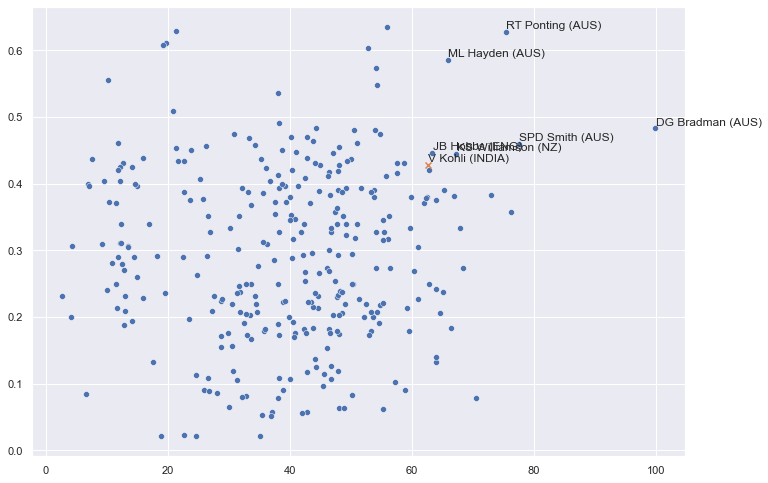

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot([data[key][0] for key in data if key != "V Kohli (INDIA)"], [data[key][1] for key in data if key != "V Kohli (INDIA)"])
plt.scatter(data["V Kohli (INDIA)"][0], data["V Kohli (INDIA)"][1], marker='x')
d_label = {key:data[key] for key in data if data[key][0] > 62 and data[key][1] > 0.425}
for i,label in enumerate(d_label):
    #plt.annotate(list(d_label.keys()), ([d_label[key][0] + 0.05 for key in d_label], [d_label[key][1] +0.005 for key in d_label]))
    plt.annotate(label, (d_label[label][0] +0.05, d_label[label][1] +0.005))

We can now see that Kohli is one of the top players and has a big impact on winning. We can also see that the Fab 4 is a legit entity, but that is analysis for another time. But this graph basically allows us to support our hypothesis that Kohli had a historical period, well and truly amongs some of the best. Also for a highly consistent period. The one thing I want to do is change the graph so that it reflects total runs per innings vs the cricket average.

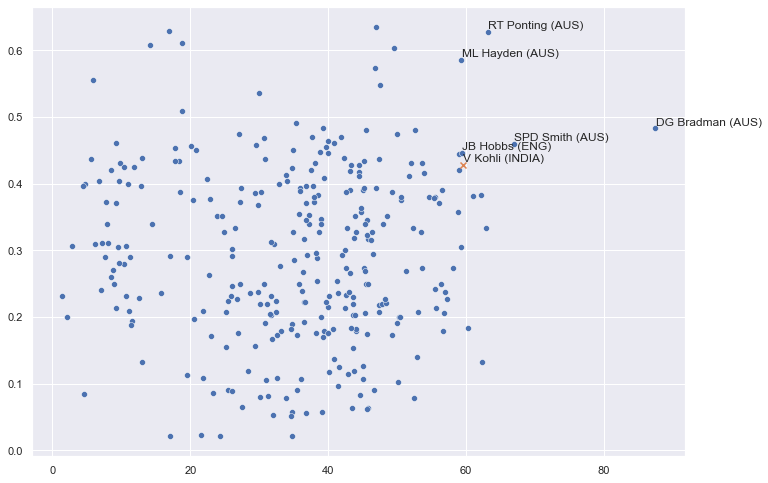

In [52]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot([data[key][0] for key in data if key != "V Kohli (INDIA)"], [data[key][1] for key in data if key != "V Kohli (INDIA)"])
plt.scatter(data["V Kohli (INDIA)"][0], data["V Kohli (INDIA)"][1], marker='x')
d_label = {key:data[key] for key in data if data[key][0] > 59 and data[key][1] > 0.425}
for i,label in enumerate(d_label):
    #plt.annotate(list(d_label.keys()), ([d_label[key][0] + 0.05 for key in d_label], [d_label[key][1] +0.005 for key in d_label]))
    plt.annotate(label, (d_label[label][0] +0.05, d_label[label][1] +0.005))

With the above graph we can now see that  Kohli is one of the top in batsman ever in these criteria. Only Smith, who is also historically good, punter, and Bradman are better.

## Lets get cumulative average for the innings.

In [12]:
sr_1 = af.cumulative_sr(kohli_innings[1])

<AxesSubplot:>

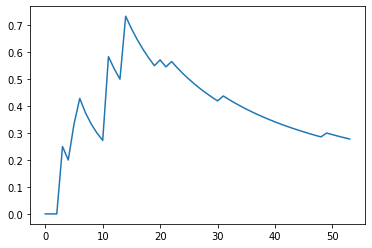

In [15]:
x = list(range(len(sr_1)))
sns.lineplot(x, sr_1)

Ok, se we have graphed the cumulative average now. But lets see if we should now graph the runs vs balls graph, the slope of this line would be the strike rate, so it would be good to do this graph

In [17]:
kohli_innings[1].columns

Index(['_uid', 'id', 'inningNumber', 'ballsActual', 'ballsUnique',
       'oversUnique', 'oversActual', 'overNumber', 'ballNumber', 'totalRuns',
       'batsmanRuns', 'isFour', 'isSix', 'isWicket', 'dismissalType', 'byes',
       'legbyes', 'wides', 'noballs', 'timestamp', 'batsmanPlayerId',
       'bowlerPlayerId', 'totalInningRuns', 'title', 'dismissalText',
       'commentPreTextItems', 'commentTextItems', 'commentPostTextItems',
       'commentVideos', 'events', 'over', 'batsmanName', 'bowlerName',
       'bowlerRuns', 'battingTeam', 'dismissedBatsman', 'batsmanBallsFaced'],
      dtype='object')

In [25]:
runs = 0
runs_cum = []
balls = []
for i,row in kohli_innings[1].iterrows():
    runs += row.batsmanRuns
    runs_cum.append(runs)
    balls.append(row.batsmanBallsFaced)

<AxesSubplot:>

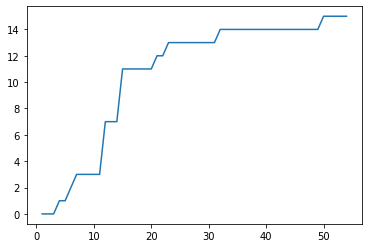

In [28]:
sns.lineplot(balls, runs_cum)

I personally think this is a much better way to represent the data, and furthermore it gives a more intuitive idea of how a batsman is scoring in their innings. Things we may want to do now is to put the shot that was played in a colour under the graph. Maybe this can be a bar graph and would show in different colours the shot that was played. The next thing we can also do is graph this graph for all innings on the same axis, we would basically run through each inning and then graph 

In [16]:
run_totals = []
ball_totals = []
for inning in kohli_innings:
    runs = 0
    runs_cum = []
    balls = []
    for i,row in inning.iterrows():
        if len(balls) != 0:
            if not row.batsmanBallsFaced == balls[-1]:
                runs += row.batsmanRuns
                runs_cum.append(runs)
                balls.append(row.batsmanBallsFaced)
        else:
            runs += row.batsmanRuns
            runs_cum.append(runs)
            balls.append(row.batsmanBallsFaced)
            
    run_totals.append(runs_cum)
    ball_totals.append(balls)

In [35]:
len(run_totals[1])

54

In [17]:
balls_faced = max(ball_totals, key=lambda x: len(x))

Sns takes a df with all the properties on it. We can put the balls faced as the index and we can put the inning as each column.

In [39]:
run_df = pd.DataFrame(run_totals)

In [40]:
run_df

,0,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,361,362,363,364,365
0,0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.0,0.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0,2.0,2.0,2.0,2.0,6.0,6.0,6.0,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,0,2.0,2.0,2.0,4.0,5.0,9.0,10.0,10.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
run_df = run_df.T

In [42]:
run_df

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,172
0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,NaN,4.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
2,0.0,0.0,NaN,0.0,4.0,1.0,1.0,0.0,NaN,4.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0
3,0.0,1.0,NaN,0.0,4.0,1.0,1.0,0.0,NaN,5.0,...,0.0,1.0,4.0,0.0,0.0,2.0,0.0,2.0,0.0,4.0
4,0.0,1.0,NaN,0.0,4.0,5.0,1.0,0.0,NaN,8.0,...,1.0,1.0,4.0,0.0,0.0,2.0,1.0,4.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

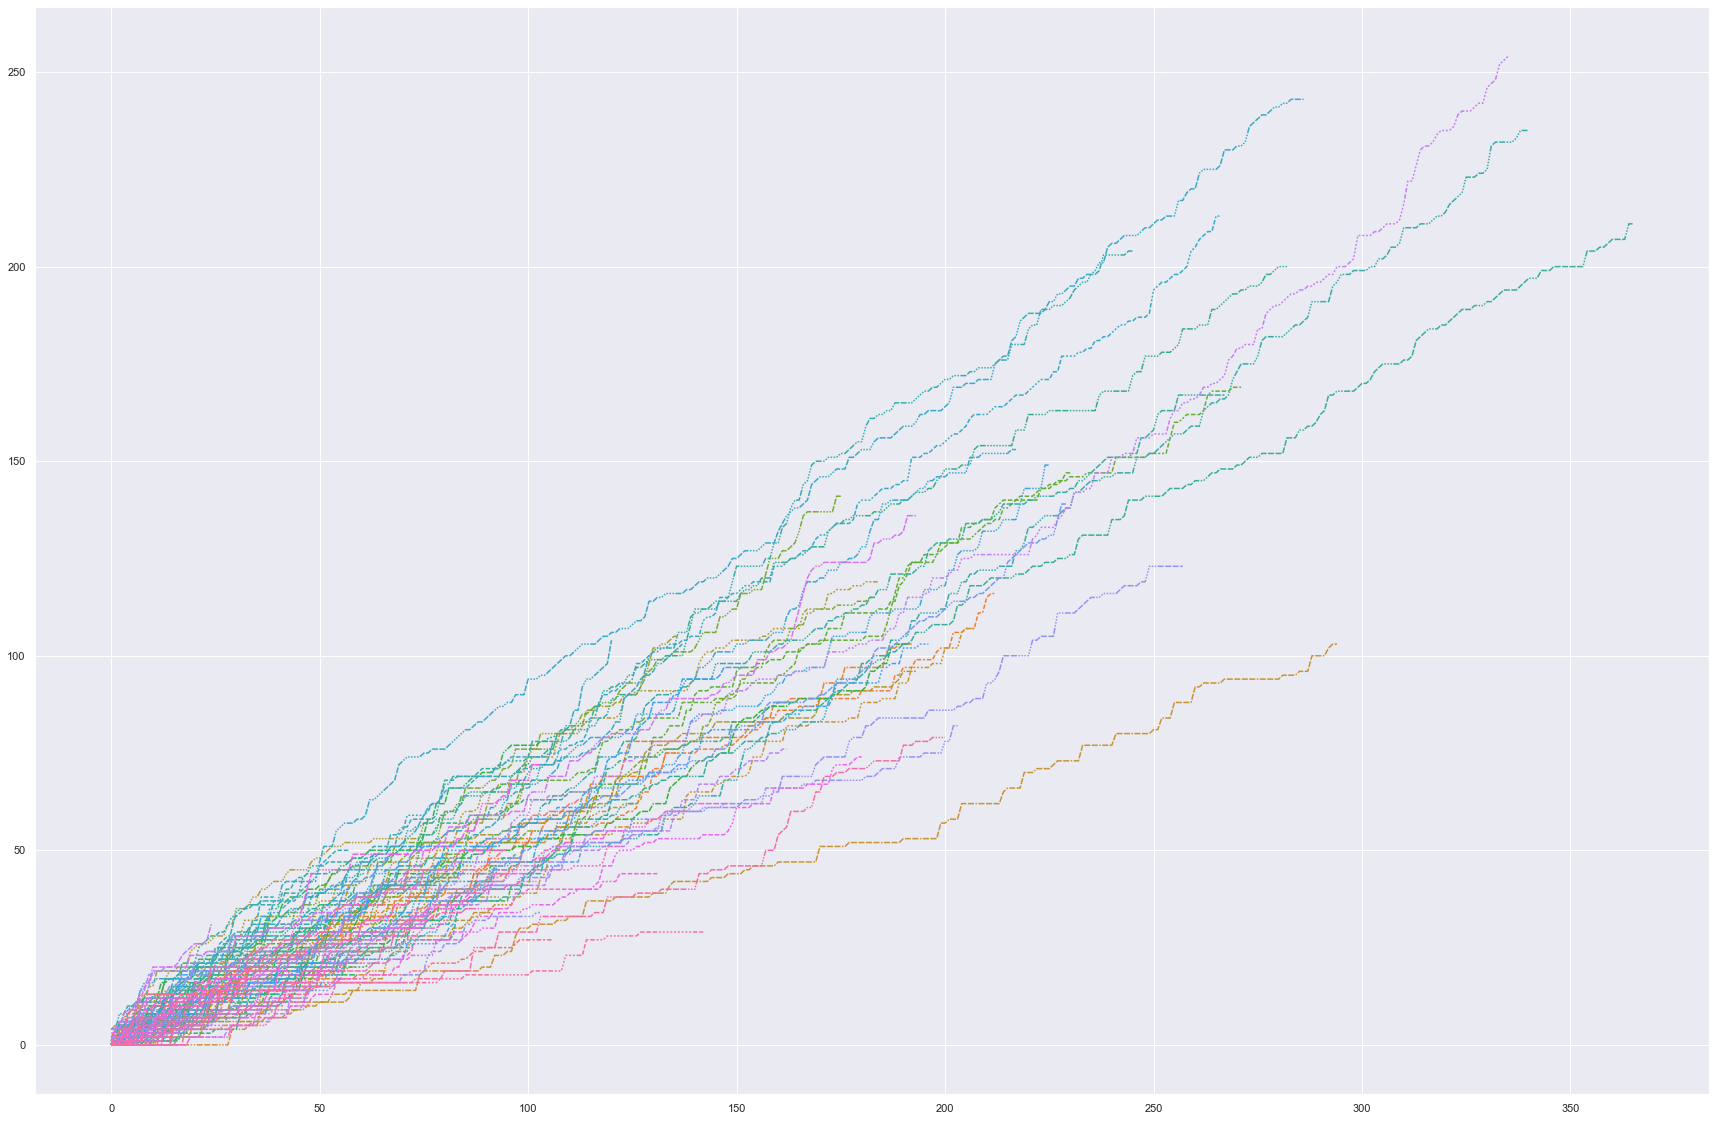

In [50]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(data=run_df.iloc[:,:], legend=False)

Ok, so it is hard to see here if there is a real difference between the strike rates of the innings. I will want to graph less of the innings and we can see if there is a difference between strike rates throughout Kohli's career. Lets maybe graph every 5-10 innings, and then also lets just graph the hundreds.

In [57]:
hundreds = []
for i,ru in enumerate(run_totals):
    if ru[-1] >= 100:
        hundreds.append(i)

x=10
every_x = [i*x for i in range((len(run_totals)+x)//x)]

In [66]:
for i, hundred in enumerate(hundreds):
    print(i, hundred, run_totals[hundred][-1])

0 13 116
1 16 103
2 24 103
3 25 107
4 33 119
5 40 105
6 51 115
7 52 141
8 55 169
9 57 147
10 60 103
11 72 200
12 80 211
13 84 167
14 88 235
15 90 204
16 98 103
17 102 104
18 103 213
19 104 243
20 108 153
21 112 149
22 117 103
23 122 139
24 126 123
25 137 254
26 140 136


In [58]:
every_x

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]

#### Innings graph for Kohli 256

<AxesSubplot:ylabel='137'>

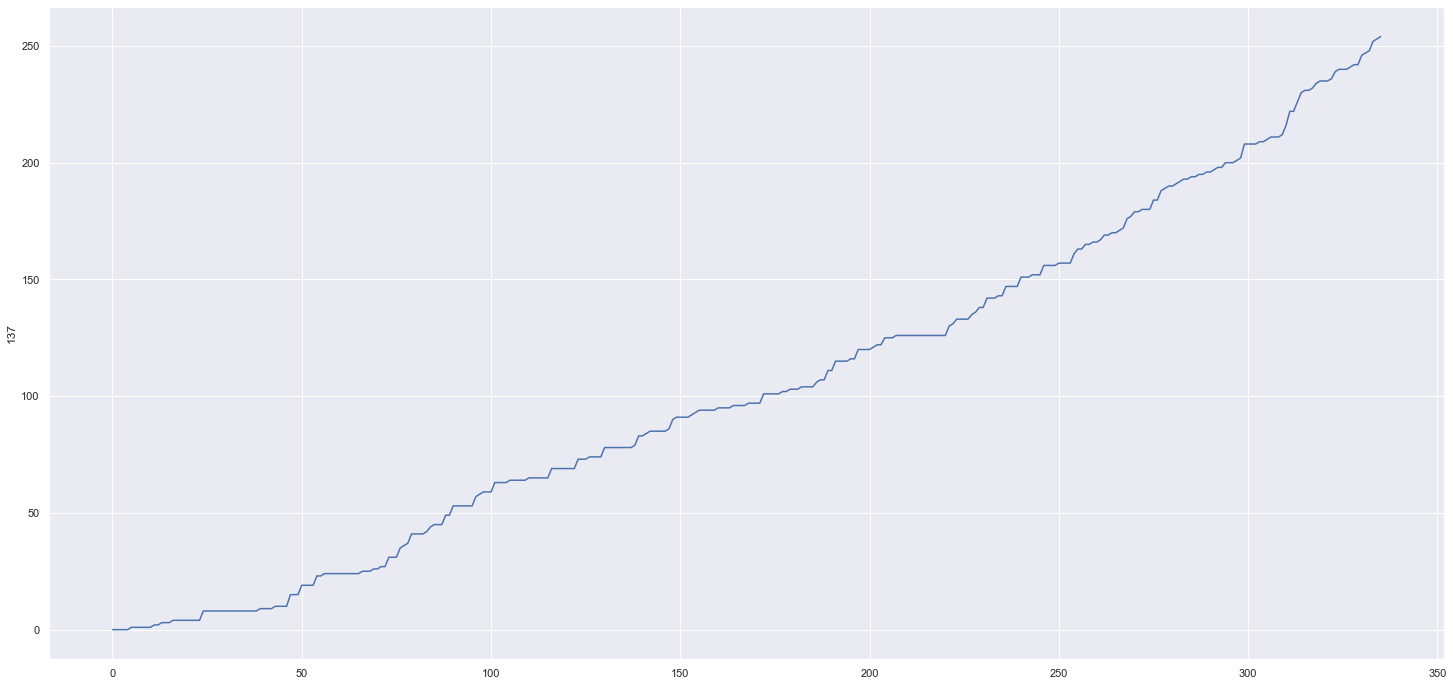

In [69]:
sns.set(rc={'figure.figsize':(25,12)})
sns.lineplot(data=run_df.iloc[:,hundreds[25]], legend=False)

Just a thought, but can we analyse the 'tempo' of an innings based of the slope. We can see distinct sections here where the slope of the graph changes. This is commonly what is reffered to as the batsman 'moving up gears'. We can se that Kohli's first 75 balls or so were slow scoreing, and the we see after that 3 distinct periods of a shift in the scoring rate. So first we need to be able to calculate the slope of a graph easily. But after that we need to be able to calculate the slope of the subset of the graph, and also the 'R' value, to get the line that fits the best to the slope. We basically want to teach the computer to recognise the distinct periods where the slope of the line changes, such that it is significantly different than the previous period. But this is not required for this video and is not a priority.

<AxesSubplot:>

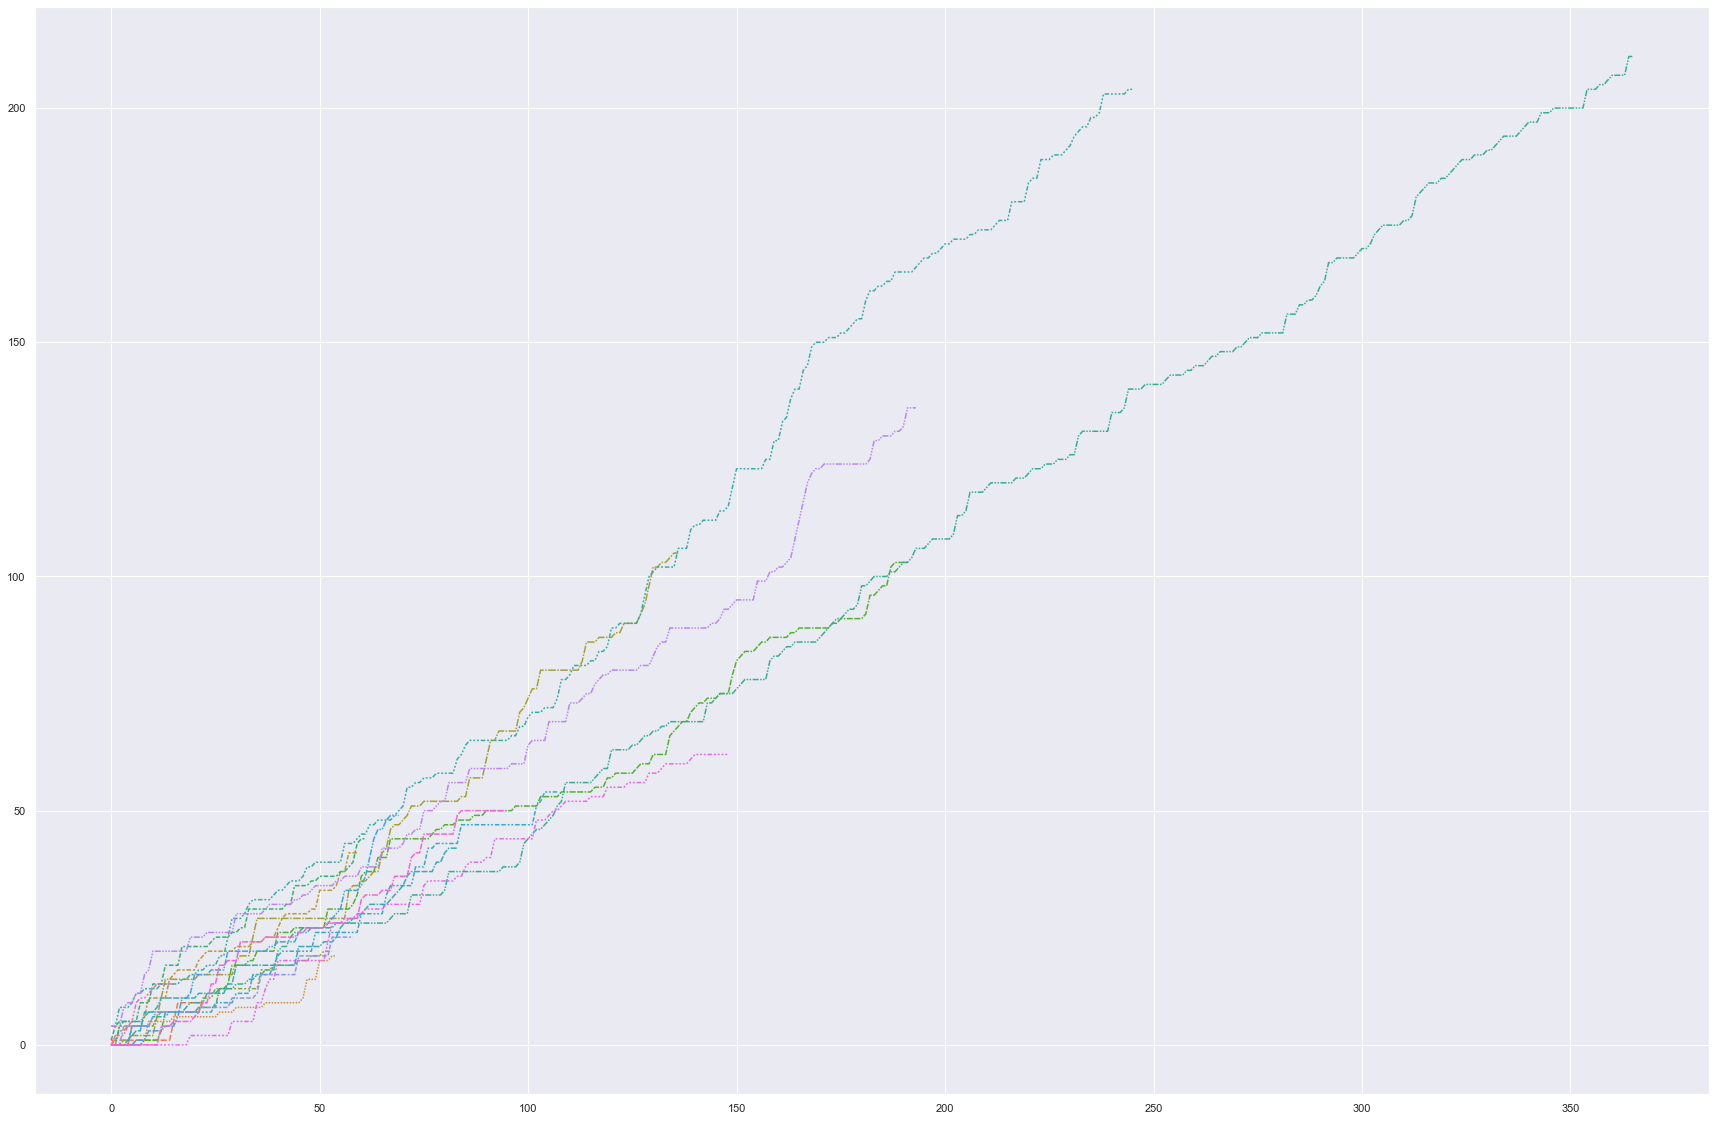

In [60]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(data=run_df.iloc[:,every_x], legend=False)

Ok, so now lets find the 'average' Kohli innings. What this means is that we will go through every innings and we will calculate the average number of runs scored off of each ball and we can then plot this and see what a Kohli inning looks like.

In [18]:
average_runs = average_elements_of_list(run_totals)

## Runs per ball in Kohli innings

<AxesSubplot:>

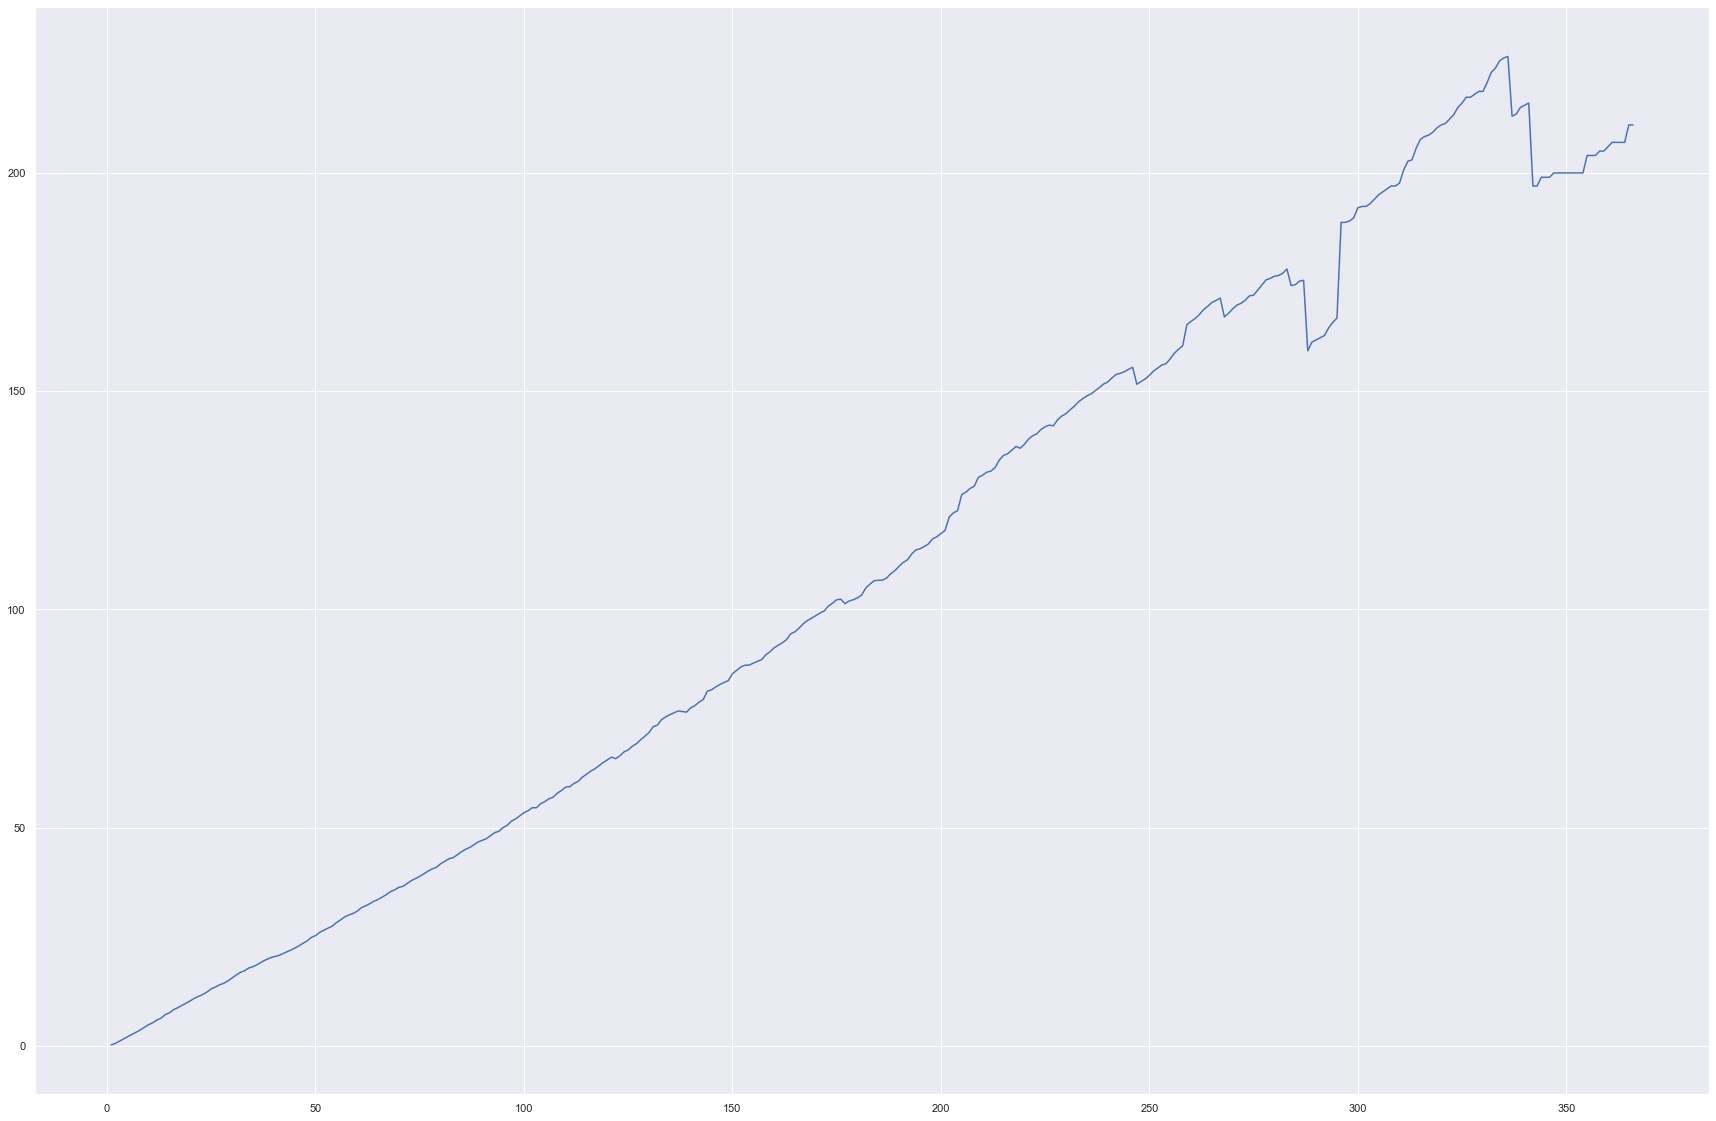

In [21]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(x=balls_faced, y=average_runs)

Actually what we really want to do is to not average the cumulative totals, but the runs scored off of each ball and then run a cumulative function on it.

In [22]:
innings_lists = [list(x.batsmanRuns) for x in kohli_innings]

In [24]:
average_inning = average_elements_of_list(innings_lists)

In [27]:
average_inning_runs = []
runs = 0
for run in average_inning:
    runs += run
    average_inning_runs.append(runs)
    

<AxesSubplot:>

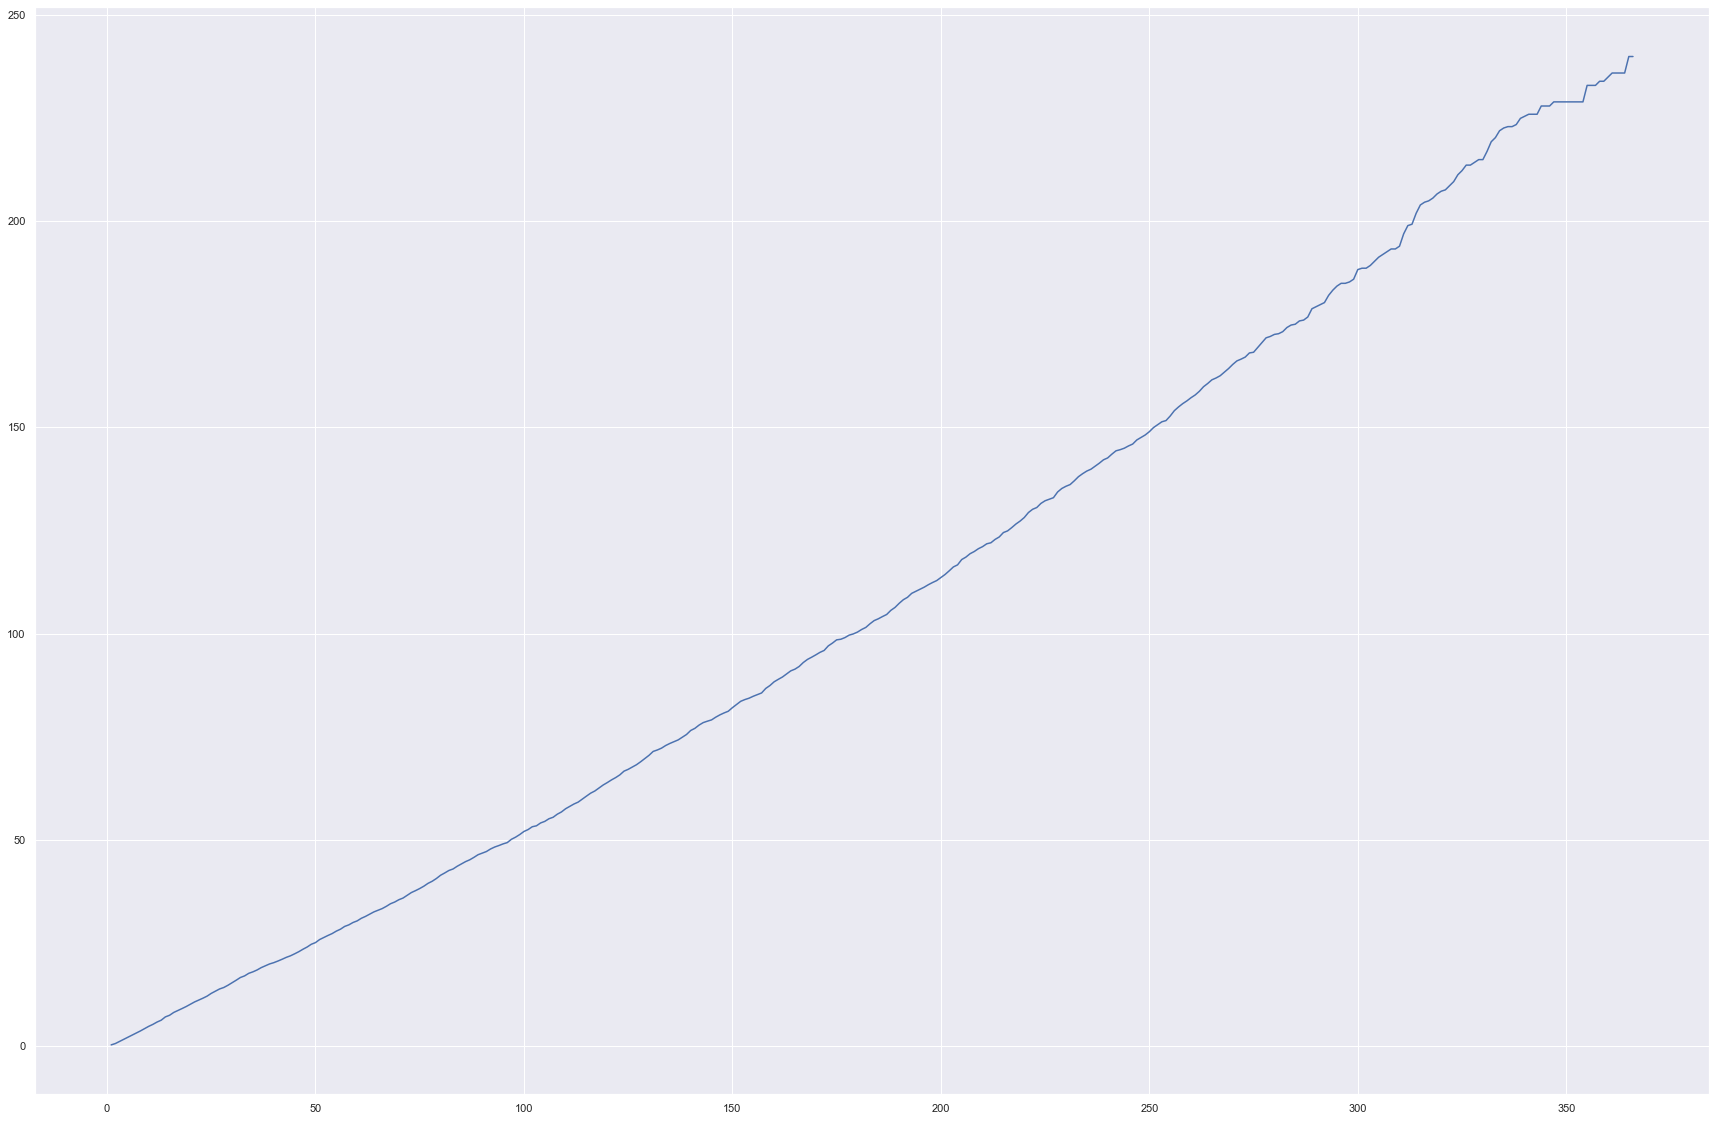

In [28]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(x=balls_faced, y=average_inning_runs)

The  graph above shows that Kohli's average scoring rate is generally linear. He does not accelerate as the innings progresses, in general his run rate hovers around 0.5-0.6 througout his inning. Is this typical? It doesnt matter for our video, but we can try to find out if this changed at all during his out of form period. So let us first only make this graph for his good form period, then we will also do it for his out of form period.

In [47]:
bad_innings_lists = [list(x.batsmanRuns) for x in kohli_innings[141:]]
bad_average_inning = average_elements_of_list(bad_innings_lists)
bad_average_inning_runs = []
runs = 0
for run in bad_average_inning:
    runs += run
    bad_average_inning_runs.append(runs)

good_innings_lists = [list(x.batsmanRuns) for x in kohli_innings[:141]]
good_average_inning = average_elements_of_list(good_innings_lists)
good_average_inning_runs = []
runs = 0
for run in good_average_inning:
    runs += run
    good_average_inning_runs.append(runs)



<AxesSubplot:>

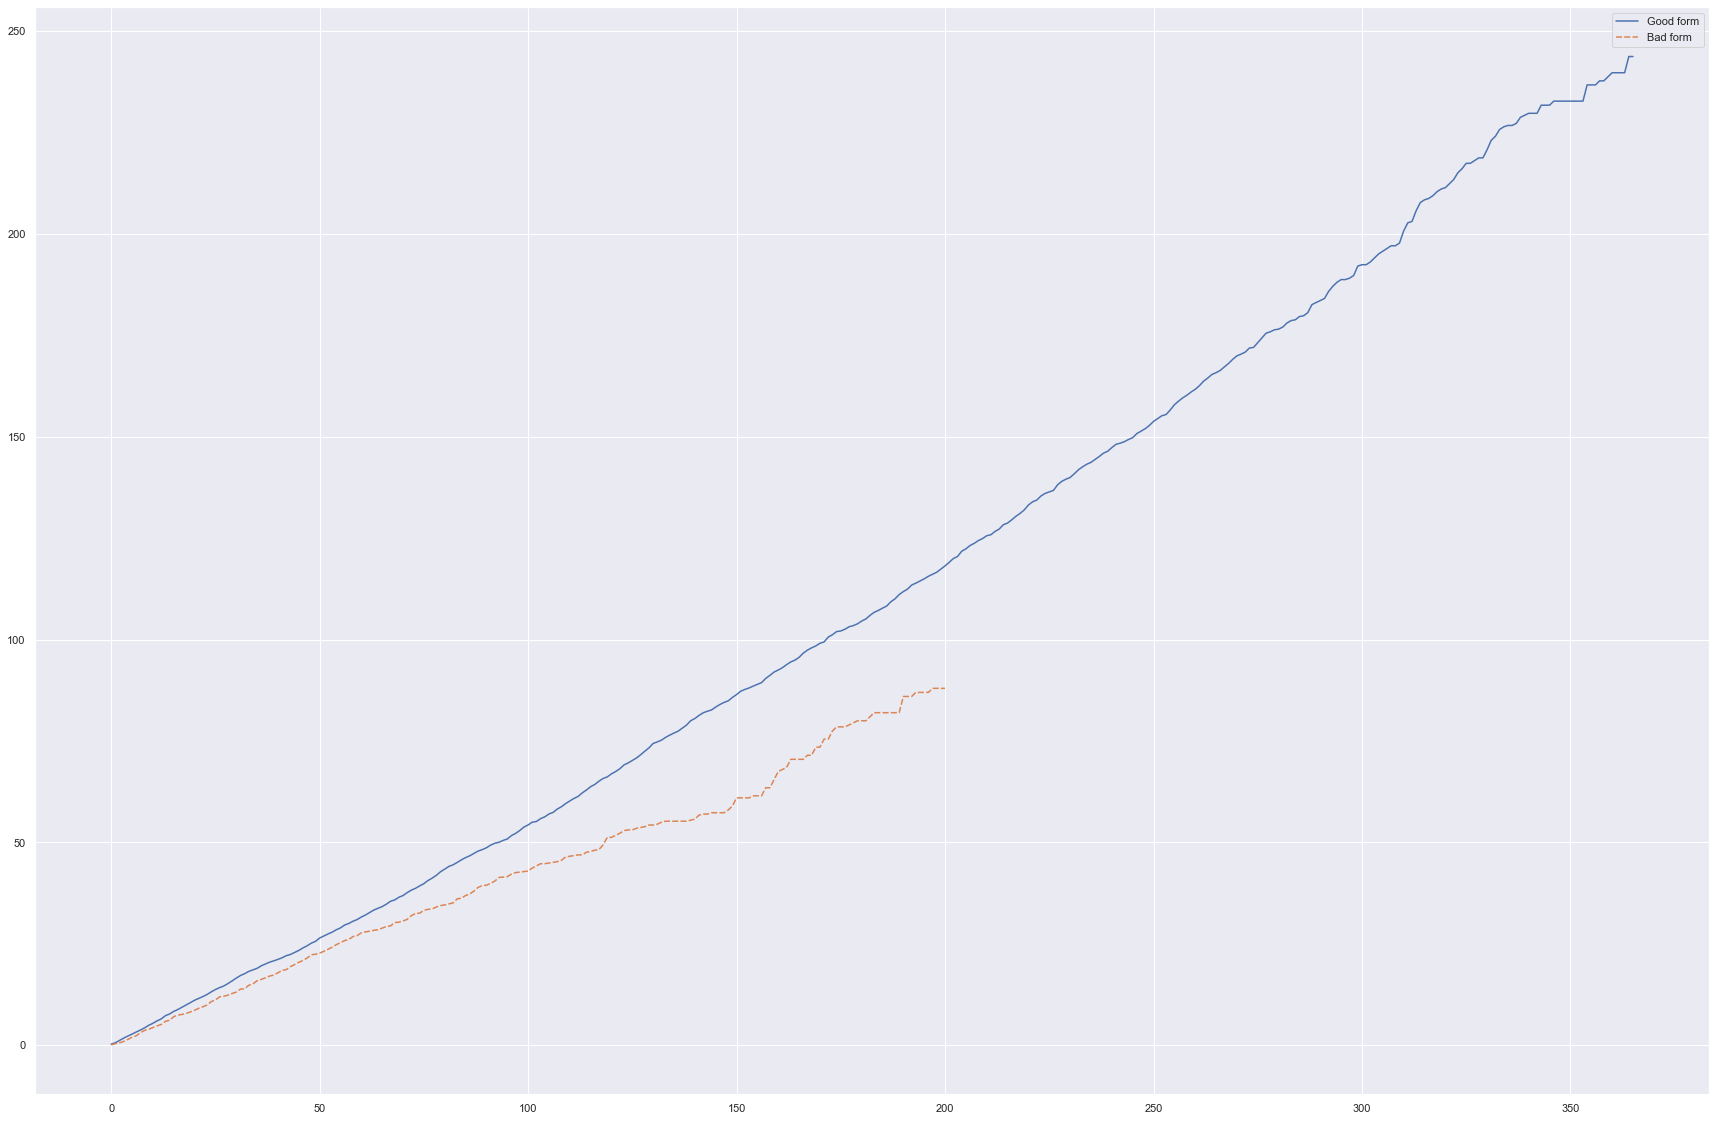

In [50]:
df = pd.DataFrame([good_average_inning_runs, bad_average_inning_runs])
df=df.T
df.columns = ['Good form', 'Bad form']
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(data=df)

So basically we can see that Kohli scores at a significantly slower rate when he was out of form, so he was more "watchful". We dont know if this is the case for other batsman as well, we can quickly check if it is the case that since 2020, scoring rates have been slower generally, but we can probably figure out if this is the case for real. But at the moment let us conclude that Virat Kohli has been more watchful, this means that mentally he may be thinking a bit more about how he intends to score. Combine this with the fact that Kohli does not seem to be lowering his percentage of playing the cover drive, this results in him forcing the issue probably and playing more risky cover drives than he would do normally when the runs are flowing nicely. We can get a quote from a player discussing how when runs are not coming, you try to 'search' for when your next run comes from.

<AxesSubplot:>

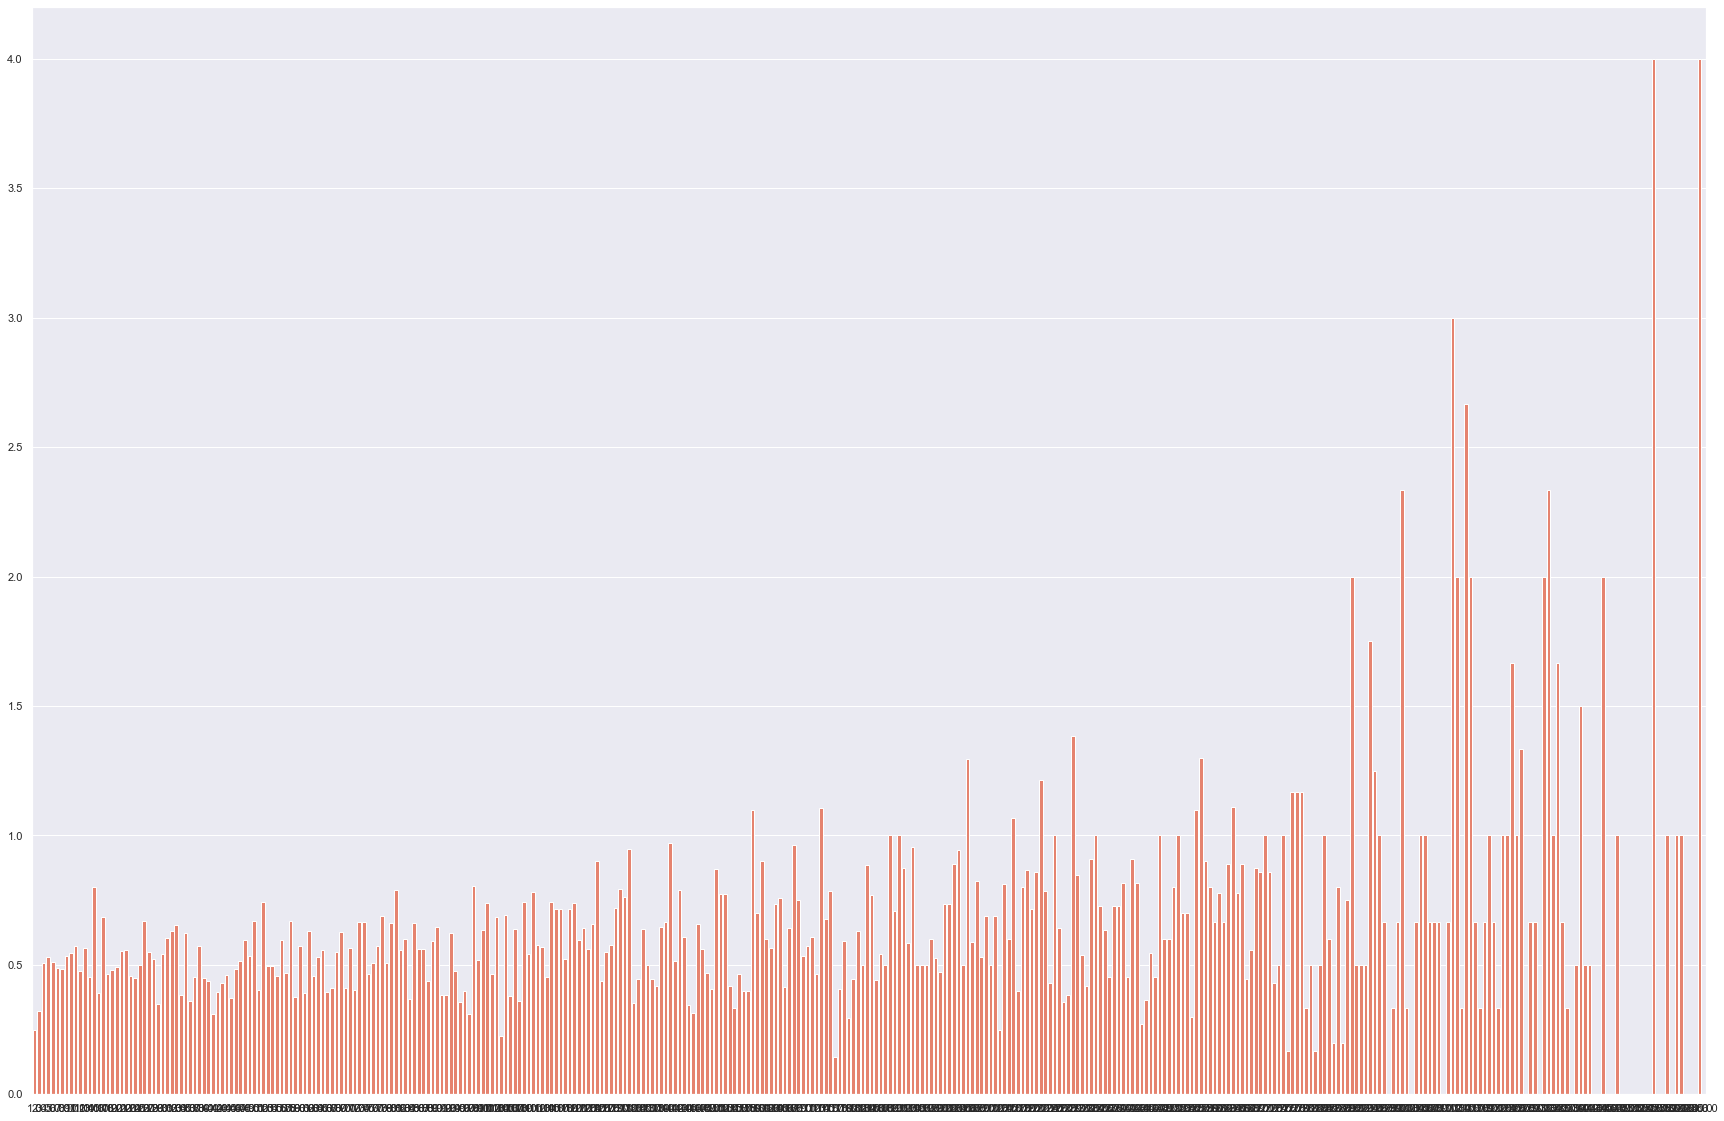

In [40]:
sns.set(rc={'figure.figsize':(30,20)})
sns.barplot(x=balls_faced, y=average_inning, color='#f8765c', edgecolor=None)

Again, this is yet another graph to show that in general, Kohli does not increase his scoring rate.

## Generalizing the cumulative runs functions

In [13]:
def innings_graph(player_id, player_innings = None, is_object_id=True):
    """Takes a number of player innings (ball-by-ball scores) and returns df of cumulative run scored over the inning. We will also add graphs to show shot played"""
    if not player_innings:
        player_innings = af.get_player_contributions(player_id, _type='bat', by_innings=True, is_object_id=is_object_id)
    
    run_totals = []
    ball_totals = []

    for inning in player_innings:
        runs = 0
        runs_cum = []
        balls = []
        for i,row in inning.iterrows():
            if len(balls) != 0:
                if not row.batsmanBallsFaced == balls[-1]:
                    runs += row.batsmanRuns
                    runs_cum.append(runs)
                    balls.append(row.batsmanBallsFaced)
            else:
                runs += row.batsmanRuns
                runs_cum.append(runs)
                balls.append(row.batsmanBallsFaced)
                
        run_totals.append(runs_cum)
        ball_totals.append(balls)
    
    run_df = pd.DataFrame(run_totals)
    run_df = run_df.T

    return run_df

In [8]:
root_matches = wsf.get_player_match_list(ROOT_PLAYER_ID)
root_innings = af.get_player_contributions(int(ROOT_PLAYER_ID), matches=root_matches, _type='bat', by_innings=True, is_object_id=True)

In [14]:
root_batting = innings_graph(ROOT_PLAYER_ID, root_innings)

<AxesSubplot:>

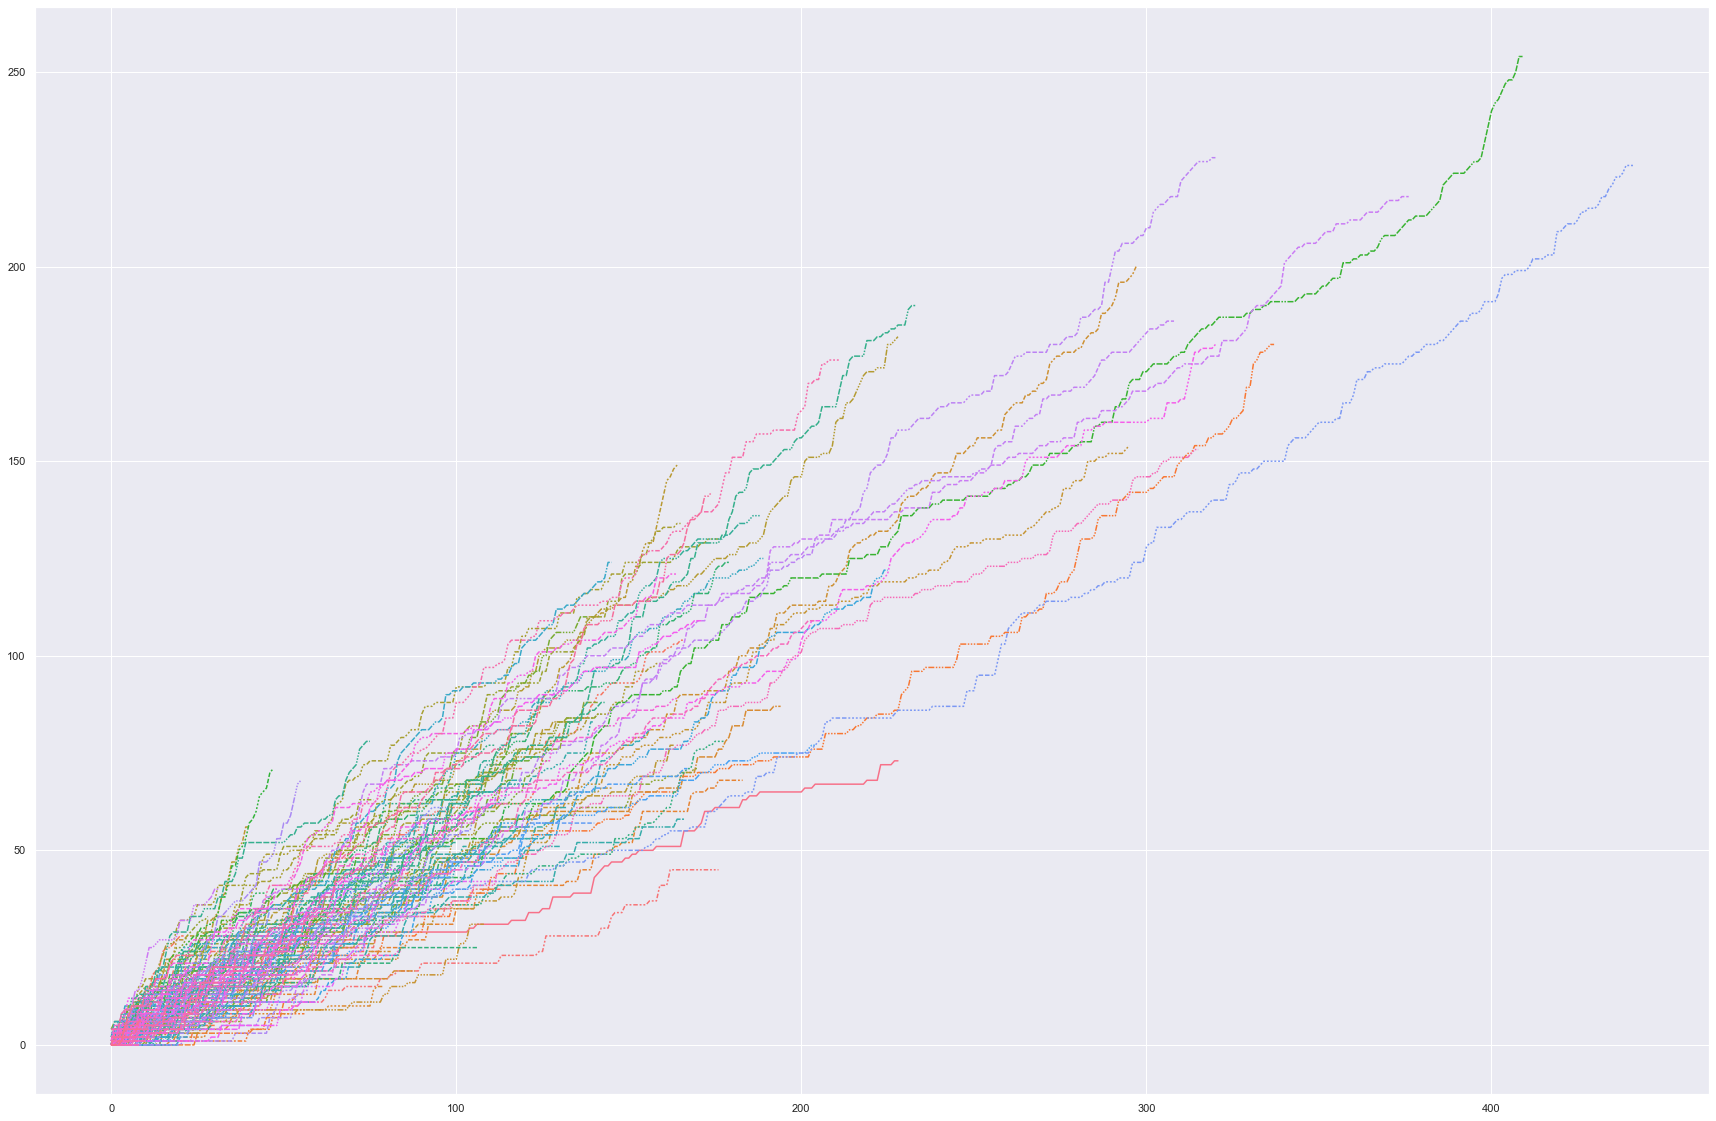

In [16]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(data=root_batting, legend=None)


Ok we want to see Rooty's scoring rate since Kohli's inning as well. So lets get the innings before our date, the innings after our date. Graph the two average innings from both these instances and then we can go from there. So lets do that.

In [3]:
date = '2020-02-20'
root_pre = wsf.get_player_match_list(ROOT_PLAYER_ID, f':{date}')
root_post = wsf.get_player_match_list(ROOT_PLAYER_ID, f'{date}:')
smith_pre = wsf.get_player_match_list(SPD_SMITH_ID, f':{date}')
smith_post = wsf.get_player_match_list(SPD_SMITH_ID, f'{date}:')
williamson_pre = wsf.get_player_match_list(WILLIAMSON_PLAYER_ID, f':{date}')
williamson_post = wsf.get_player_match_list(WILLIAMSON_PLAYER_ID, f'{date}:')

In [4]:
root_pre_innings = af.get_player_contributions(ROOT_PLAYER_ID, root_pre, _type='bat', is_object_id=True, by_innings=True)
root_post_innings = af.get_player_contributions(ROOT_PLAYER_ID, root_post, _type='bat', is_object_id=True, by_innings=True)
smith_pre_innings = af.get_player_contributions(SPD_SMITH_ID, smith_pre, _type='bat', is_object_id=True, by_innings=True)
smith_post_innings = af.get_player_contributions(SPD_SMITH_ID, smith_post, _type='bat', is_object_id=True, by_innings=True)
williamson_pre_innings = af.get_player_contributions(WILLIAMSON_PLAYER_ID, williamson_pre, _type='bat', is_object_id=True, by_innings=True)
williamson_post_innings = af.get_player_contributions(WILLIAMSON_PLAYER_ID, williamson_post, _type='bat', is_object_id=True, by_innings=True)


In [5]:
batsman_innings = {
    ROOT_PLAYER_ID:{
        'pre':root_pre_innings,
        'post':root_post_innings
    },
    SPD_SMITH_ID:{
        'pre':smith_pre_innings,
        'post':smith_post_innings
    },
    WILLIAMSON_PLAYER_ID:{
        'pre':williamson_pre_innings,
        'post':williamson_post_innings
    }
}

In [7]:
dfs = []
for batsman in batsman_innings:
    pre_innings_lists = [list(x.batsmanRuns) for x in batsman_innings[batsman]['pre']]
    pre_average_inning = af.average_elements_of_list(pre_innings_lists)
    pre_average_inning_runs = []
    runs = 0
    for run in pre_average_inning:
        runs += run
        pre_average_inning_runs.append(runs)

    post_innings_lists = [list(x.batsmanRuns) for x in batsman_innings[batsman]['post']]
    post_average_inning = af.average_elements_of_list(post_innings_lists)
    post_average_inning_runs = []
    runs = 0
    for run in post_average_inning:
        runs += run
        post_average_inning_runs.append(runs)

    df = pd.DataFrame([pre_average_inning_runs, post_average_inning_runs])
    df=df.T
    df.columns = ['pre form', 'post form']
    dfs.append(df)

    

[Text(0.5, 1.0, 'Root')]

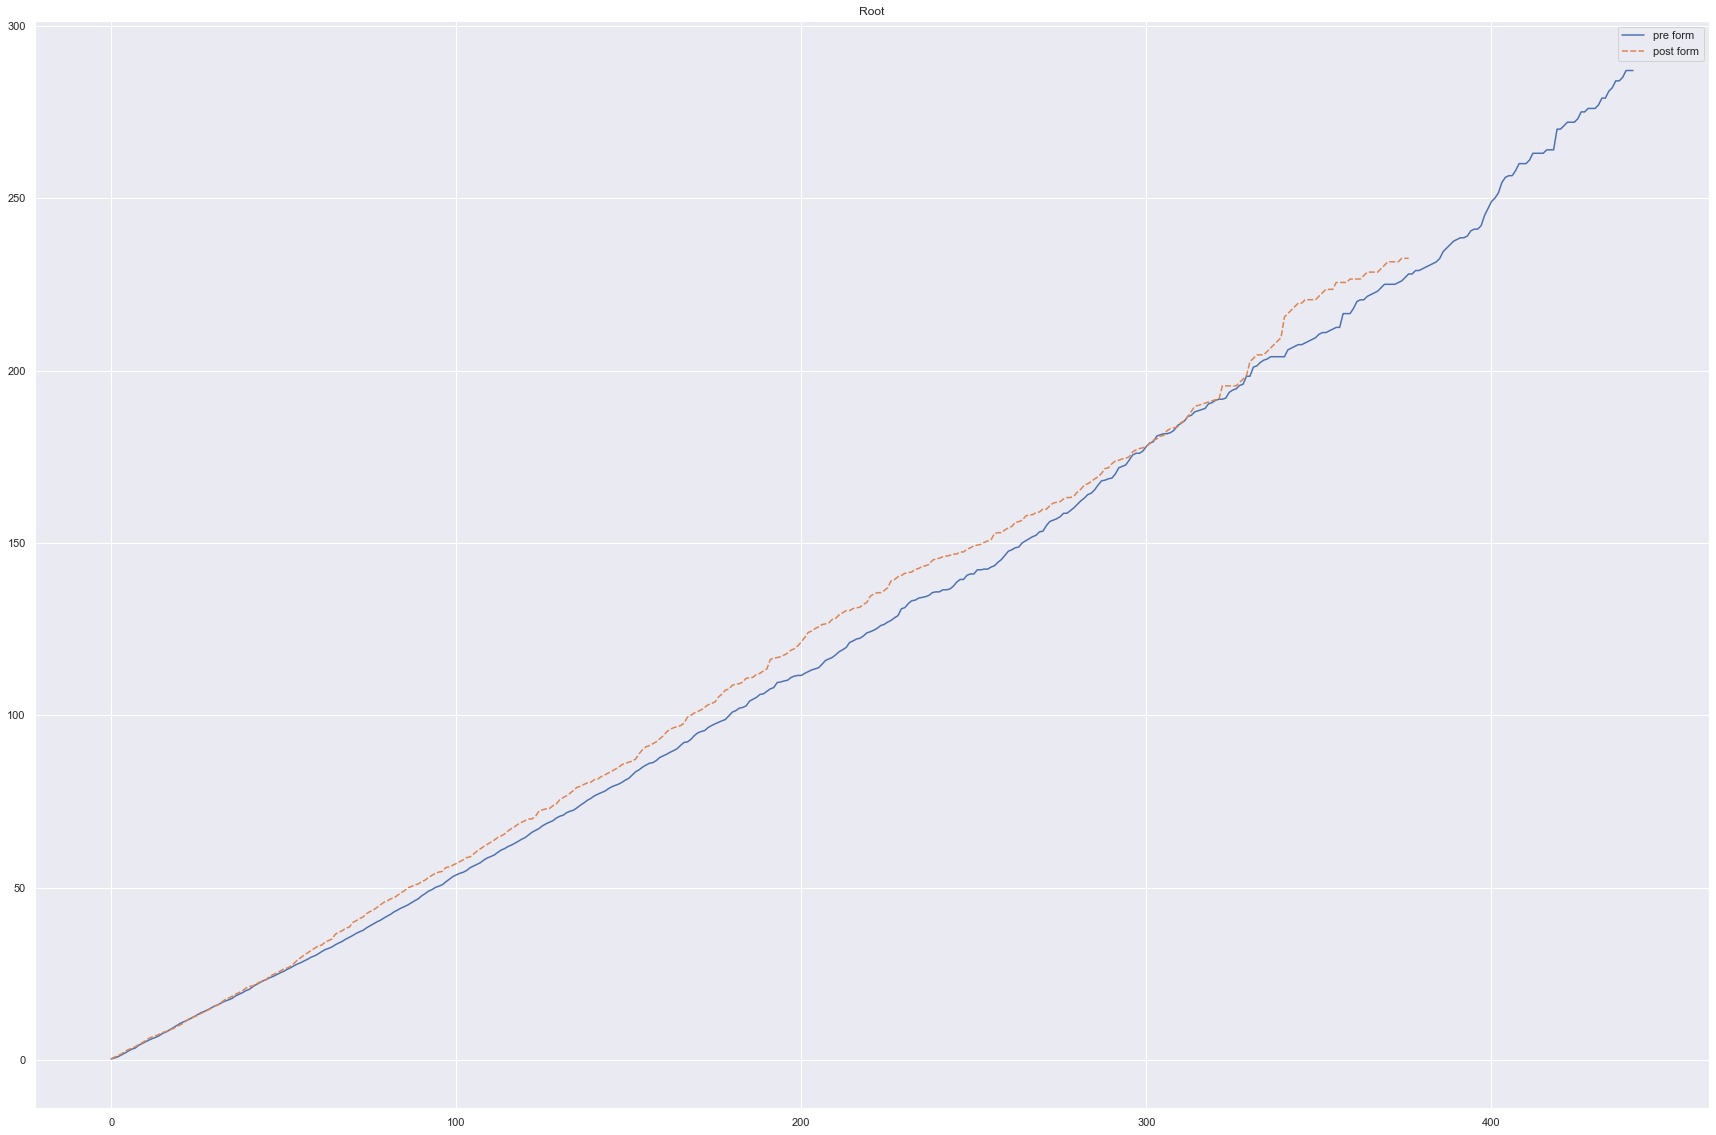

In [9]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(data=dfs[0]).set(title='Root')

[Text(0.5, 1.0, 'Smith')]

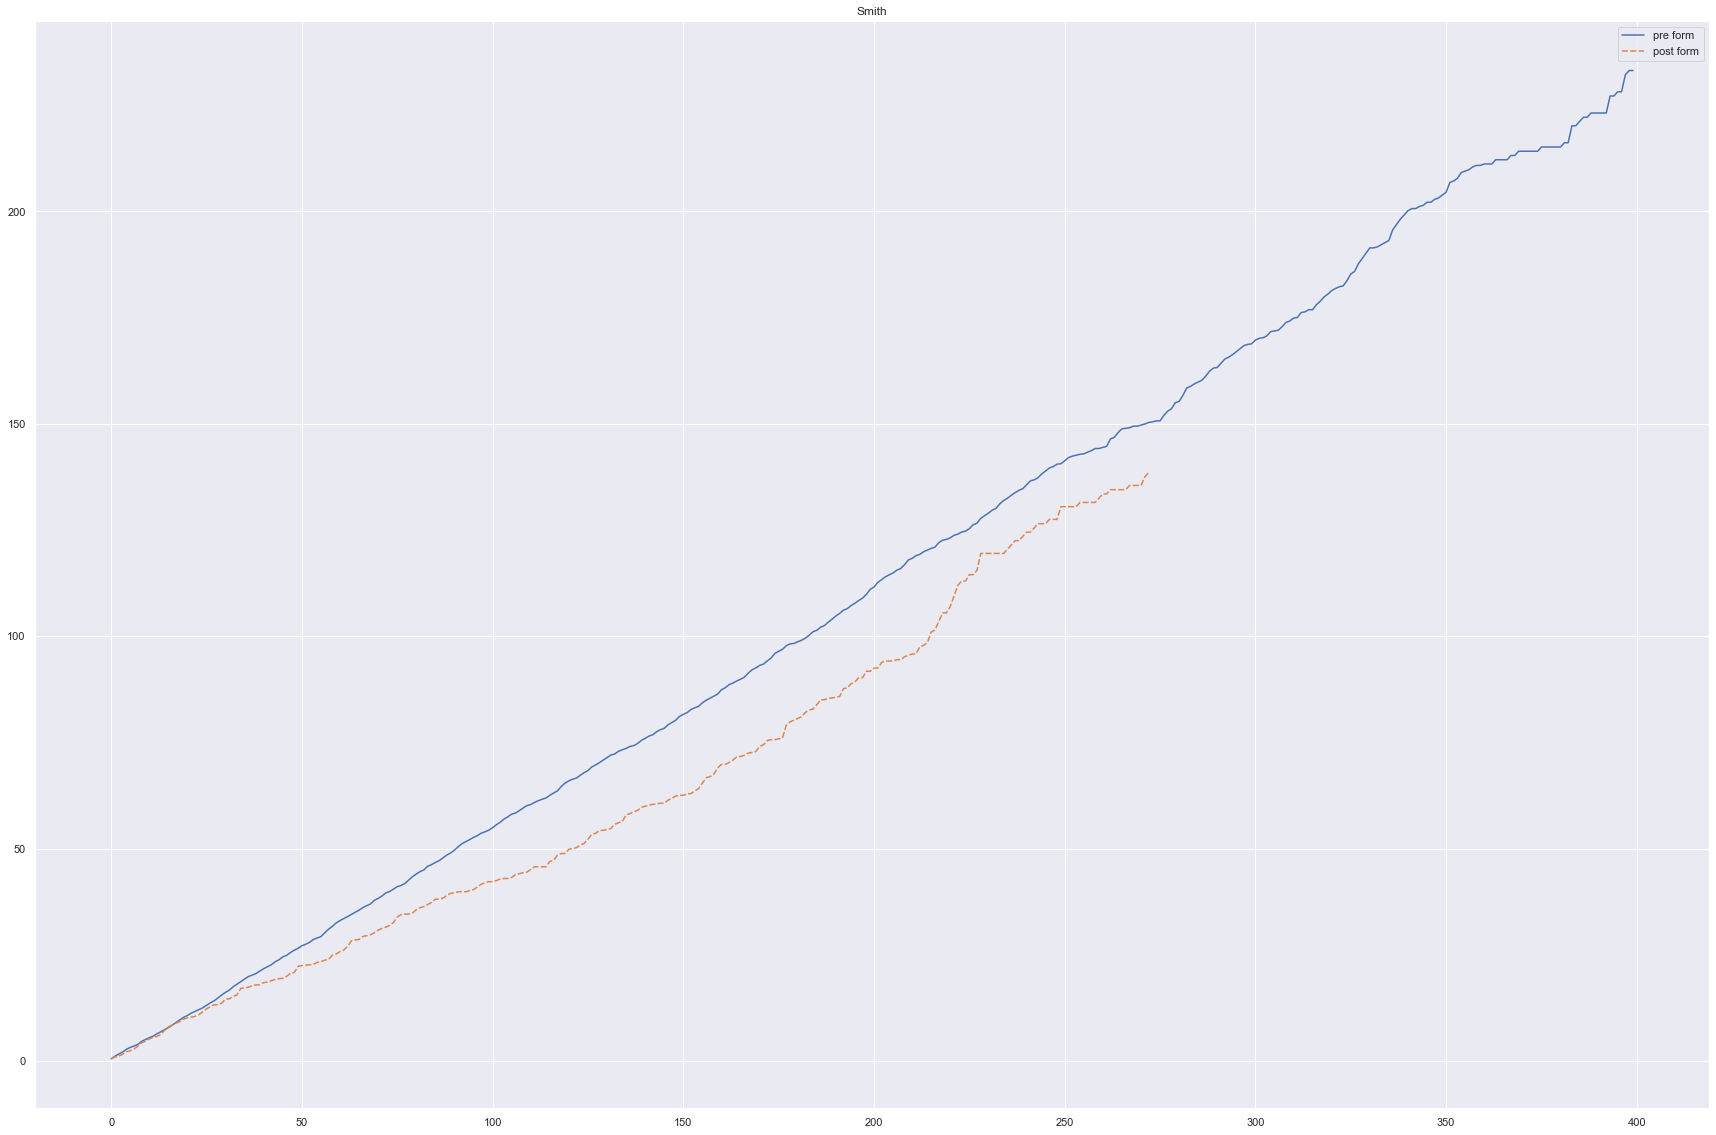

In [11]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(data=dfs[1]).set(title='Smith')

[Text(0.5, 1.0, 'Williamson')]

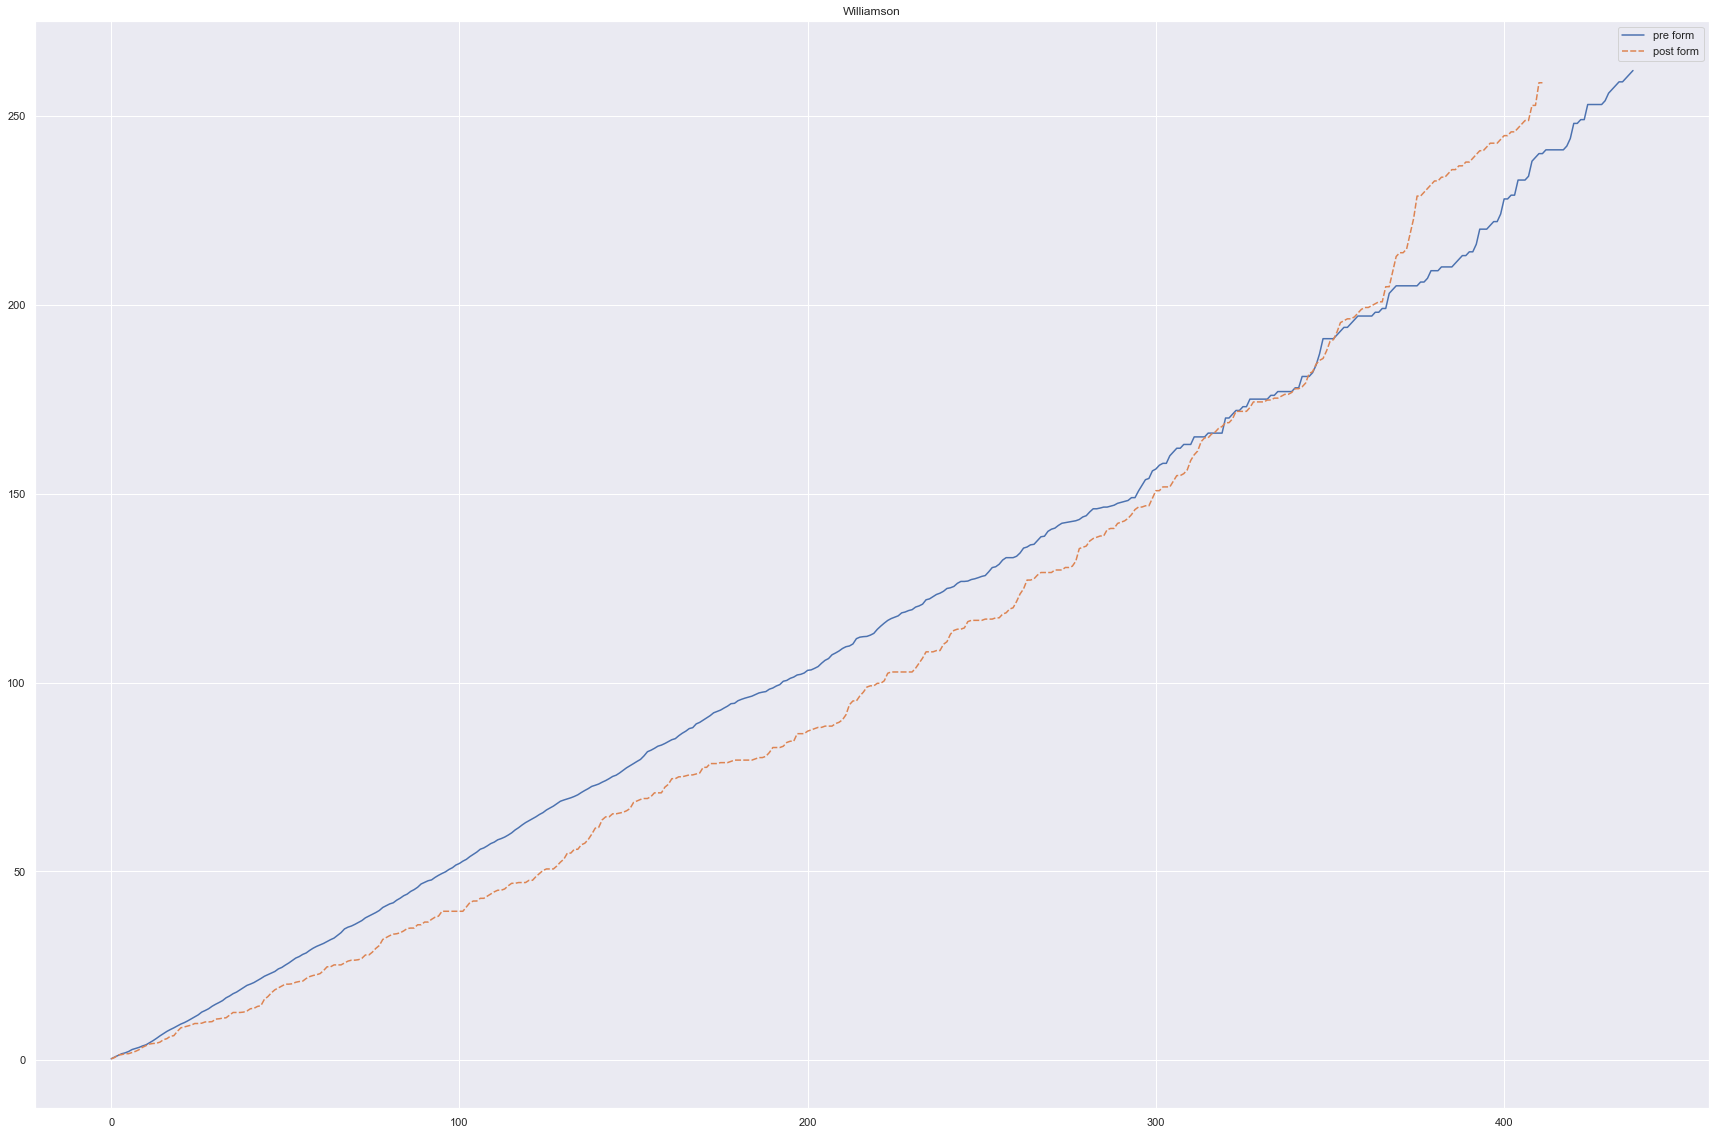

In [12]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(data=dfs[2]).set(title='Williamson')

So it seems that Smith seems to have the same scoring struggles that Kohli seems to have, but Root and Williamson, Root especially have shown that they can score at an equal or greater rate. Similar to Kohli actually, Smith has also seen a distinct drop in form compared to his historically great career. So scoring rate is probably indicitive of form by some measure. The less 'in form' a batman is, the more cautious they seem to be in their scoring. This plays into the Kohli hypothesis well, because it kind of shows that Kohli is more not necesariyl more cautious, but his is just less fluent, and forcing shots way more. Rather than things coming to him naturally.

Ok quickly lets figure out the test match scoring rate as a whole. For before and after the date we selected. Or just map the test match scoring rate in general.

In [9]:
m = MatchData(test_match_list[-1])

In [10]:
m.__dict__.keys()

dict_keys(['match_id', 'match_url', 'json_url', 'json', 'html', 'comms_json', '__unicode__', 'status', 'match_class', 'season', 'description', 'legacy_scorecard_url', 'series', 'series_name', 'series_id', 'event_url', 'details_url', 'officials', 'current_summary', 'present_datetime_local', 'present_datetime_gmt', 'start_datetime_local', 'start_datetime_gmt', 'cancelled_match', 'rain_rule', 'date', 'continent', 'town_area', 'town_name', 'town_id', 'weather_location_code', 'match_title', 'result', 'ground_id', 'ground_name', 'lighting', 'followon', 'scheduled_overs', 'innings_list', 'innings', 'latest_batting', 'latest_bowling', 'latest_innings', 'latest_innings_fow', 'team_1', 'team_1_id', 'team_1_abbreviation', 'team_1_players', 'team_1_innings', 'team_1_run_rate', 'team_1_overs_batted', 'team_1_batting_result', 'team_2', 'team_2_id', 'team_2_abbreviation', 'team_2_players', 'team_2_innings', 'team_2_run_rate', 'team_2_overs_batted', 'team_2_batting_result', 'home_team', 'batting_first

In [11]:
[x['run_rate'] for x in m.innings]

[4.9, 4.61, 2.99, 4.93]

In [13]:
MatchData(test_match_list[0], no_comms=True).date

'2011-06-20'

In [14]:
MatchData(test_match_list[-1], no_comms=True).date

'2022-07-01'

## Scoring Rates

Ok, as evident, we can easily get the test match list. Lets grab all matches between certain days and then loop through them to get scoring rates for every match.

In [4]:
matches_while_kohli = wsf.get_match_list(years=[2011,':'])

In [5]:
matches_while_kohli.index(test_match_list[84])

398

In [6]:
pre_tests = matches_while_kohli[:398]
post_tests = matches_while_kohli[398:]

In [23]:
pre_scoring_rates = {}
for match in pre_tests:
    m = MatchData(match, no_comms=True)
    scoring_rates = [x['run_rate'] for x in m.innings]
    try:
        pre_scoring_rates[m.date][0]+=scoring_rates
        pre_scoring_rates[m.date][1]+=len(scoring_rates)
    except KeyError:
        pre_scoring_rates[m.date] = [[],0]
        pre_scoring_rates[m.date][0]=scoring_rates
        pre_scoring_rates[m.date][1]=len(scoring_rates)

post_scoring_rates = {}
for match in post_tests:
    m = MatchData(match, no_comms=True)
    scoring_rates = [x['run_rate'] for x in m.innings]
    try:
        post_scoring_rates[m.date][0]+=scoring_rates
        post_scoring_rates[m.date][1]+=len(scoring_rates)
    except KeyError:
        post_scoring_rates[m.date] = [[],0]
        post_scoring_rates[m.date][0] = scoring_rates
        post_scoring_rates[m.date][1] = len(scoring_rates)

In [25]:
pre_scoring_rates_all = pre_scoring_rates
post_scoring_rates_all = post_scoring_rates


In [7]:
from datetime import datetime

def extract_scoring_rates(pre_tests, post_tests, period=None):
    pre_scoring_rates = {}
    for match in pre_tests:
        m = MatchData(match, no_comms=True)
        date = datetime.strptime(m.date, '%Y-%m-%d')
        if period == None:
            date = m.date
        if period == 'month':
            date = datetime.strftime(date, '%Y-%m')
        if period == 'year':
            date = datetime.strftime(date, '%Y')
        scoring_rates = [x['run_rate'] for x in m.innings]
        try:
            pre_scoring_rates[date][0]+=scoring_rates
            pre_scoring_rates[date][1]+=len(scoring_rates)
        except KeyError:
            pre_scoring_rates[date] = [[],0]
            pre_scoring_rates[date][0]=scoring_rates
            pre_scoring_rates[date][1]=len(scoring_rates)

    post_scoring_rates = {}
    for match in post_tests:
        m = MatchData(match, no_comms=True)
        date = datetime.strptime(m.date, '%Y-%m-%d')
        if period == None:
            date = m.date
        if period == 'month':
            date = datetime.strftime(date, '%Y-%m')
        if period == 'year':
            date = datetime.strftime(date, '%Y')
        scoring_rates = [x['run_rate'] for x in m.innings]
        try:
            post_scoring_rates[date][0]+=scoring_rates
            post_scoring_rates[date][1]+=len(scoring_rates)
        except KeyError:
            post_scoring_rates[date] = [[],0]
            post_scoring_rates[date][0] = scoring_rates
            post_scoring_rates[date][1] = len(scoring_rates)
    
    return pre_scoring_rates, post_scoring_rates

In [35]:
pre_scoring_rates_month, post_scoring_rates_month = extract_scoring_rates(pre_tests, post_tests)

In [36]:
pre_scoring_rates_month

{'2011-01': [[3.2,
   3.1,
   3.34,
   2.02,
   2.63,
   3.62,
   3.31,
   2.81,
   3,
   2.85,
   5.72,
   2.79,
   2.82,
   3.22,
   2.45],
  15],
 '2011-05': [[2.3, 2.47, 2.45, 2.43, 2.47, 2.66, 3.35, 2.85, 3.37, 3.2, 3.32],
  11],
 '2011-06': [[4.3,
   3.63,
   4.28,
   2.95,
   2.86,
   4.06,
   3.21,
   4.01,
   2.55,
   2.65,
   3.83,
   2.95,
   2.57,
   2.63,
   2.82],
  15],
 '2011-07': [[2.66,
   3.2,
   2.44,
   2.93,
   3.6,
   2.98,
   3.78,
   2.7,
   3.21,
   3.15,
   4.52,
   3.31],
  12],
 '2011-08': [[2.82,
   2.97,
   3.16,
   4.24,
   3.59,
   3.77,
   4.39,
   3.86,
   3.19,
   3.1,
   3.15,
   2.1,
   3.53,
   2.64],
  14],
 '2011-09': [[2.73, 2.98, 2.49, 4.06, 2.71, 3.11, 2.76, 3.02, 2.71, 3.51, 3.5],
  11],
 '2011-10': [[2.65,
   2.92,
   2.87,
   2.1,
   2.85,
   3.58,
   2.83,
   4.54,
   3.02,
   2.85,
   2.33,
   3.88,
   2.8,
   3.39,
   3.43,
   3.46],
  16],
 '2011-11': [[2.96,
   2.56,
   3.54,
   3.06,
   2.69,
   2.45,
   3.12,
   1.52,
   2.8,
   3.9

In [43]:
pre_scoring_rate_aves = {}
for date in pre_scoring_rates_month:
    try:
        temp_soring_rates = []
        for rate in pre_scoring_rates_month[date][0]:
            if rate:
                temp_soring_rates.append(float(rate))
        pre_scoring_rate_aves[date] = sum(temp_soring_rates)/len(temp_soring_rates)
    except:
        print(date)
        print(pre_scoring_rates_month[date][0])

In [45]:
post_scoring_rate_aves = {}
for date in post_scoring_rates_month:
    try:
        temp_soring_rates = []
        for rate in post_scoring_rates_month[date][0]:
            if rate:
                temp_soring_rates.append(float(rate))
        post_scoring_rate_aves[date] = sum(temp_soring_rates)/len(temp_soring_rates)
    except:
        print(date)
        print(post_scoring_rates_month[date][0])

In [47]:
pre_scoring_rate_aves

{'2011-01': 3.1253333333333333,
 '2011-05': 2.8063636363636366,
 '2011-06': 3.286666666666667,
 '2011-07': 3.206666666666667,
 '2011-08': 3.3221428571428575,
 '2011-09': 3.0527272727272727,
 '2011-10': 3.09375,
 '2011-11': 3.2699999999999996,
 '2011-12': 3.4626923076923073,
 '2012-01': 3.146666666666667,
 '2012-02': 2.4425000000000003,
 '2012-03': 3.4018750000000004,
 '2012-04': 3.020625,
 '2012-05': 3.2750000000000004,
 '2012-06': 3.428,
 '2012-07': 3.194545454545455,
 '2012-08': 3.234736842105263,
 '2012-11': 3.5411428571428574,
 '2012-12': 3.056428571428572,
 '2013-01': 3.126,
 '2013-02': 3.2026666666666674,
 '2013-03': 3.145555555555556,
 '2013-04': 2.9875000000000003,
 '2013-05': 3.17125,
 '2013-07': 3.09375,
 '2013-08': 3.4583333333333335,
 '2013-09': 2.6625,
 '2013-10': 3.0828571428571427,
 '2013-11': 3.349,
 '2013-12': 3.2320512820512817,
 '2014-01': 3.5293333333333337,
 '2014-02': 3.5424999999999995,
 '2014-03': 3.6275,
 '2014-06': 3.4375,
 '2014-07': 3.1373684210526314,
 '201

<AxesSubplot:>

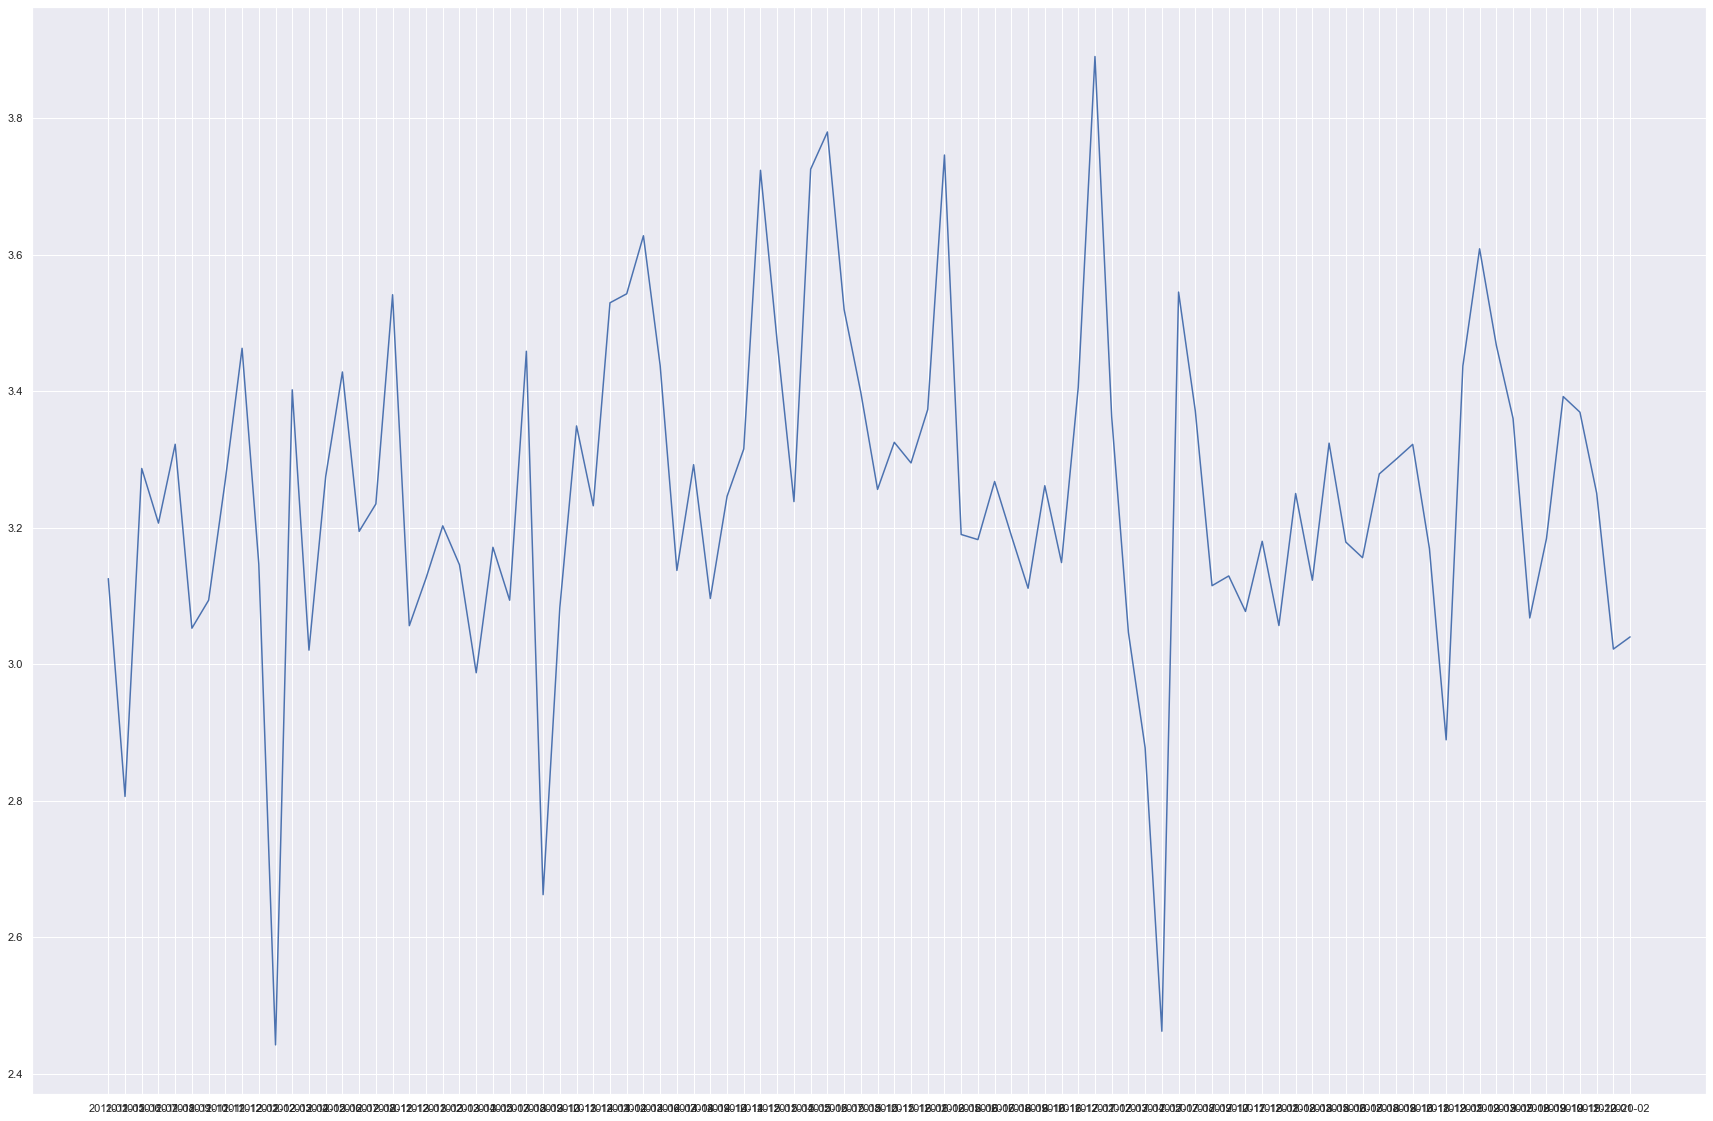

In [49]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(x=list(pre_scoring_rate_aves.keys()), y=list(pre_scoring_rate_aves.values()))

<AxesSubplot:>

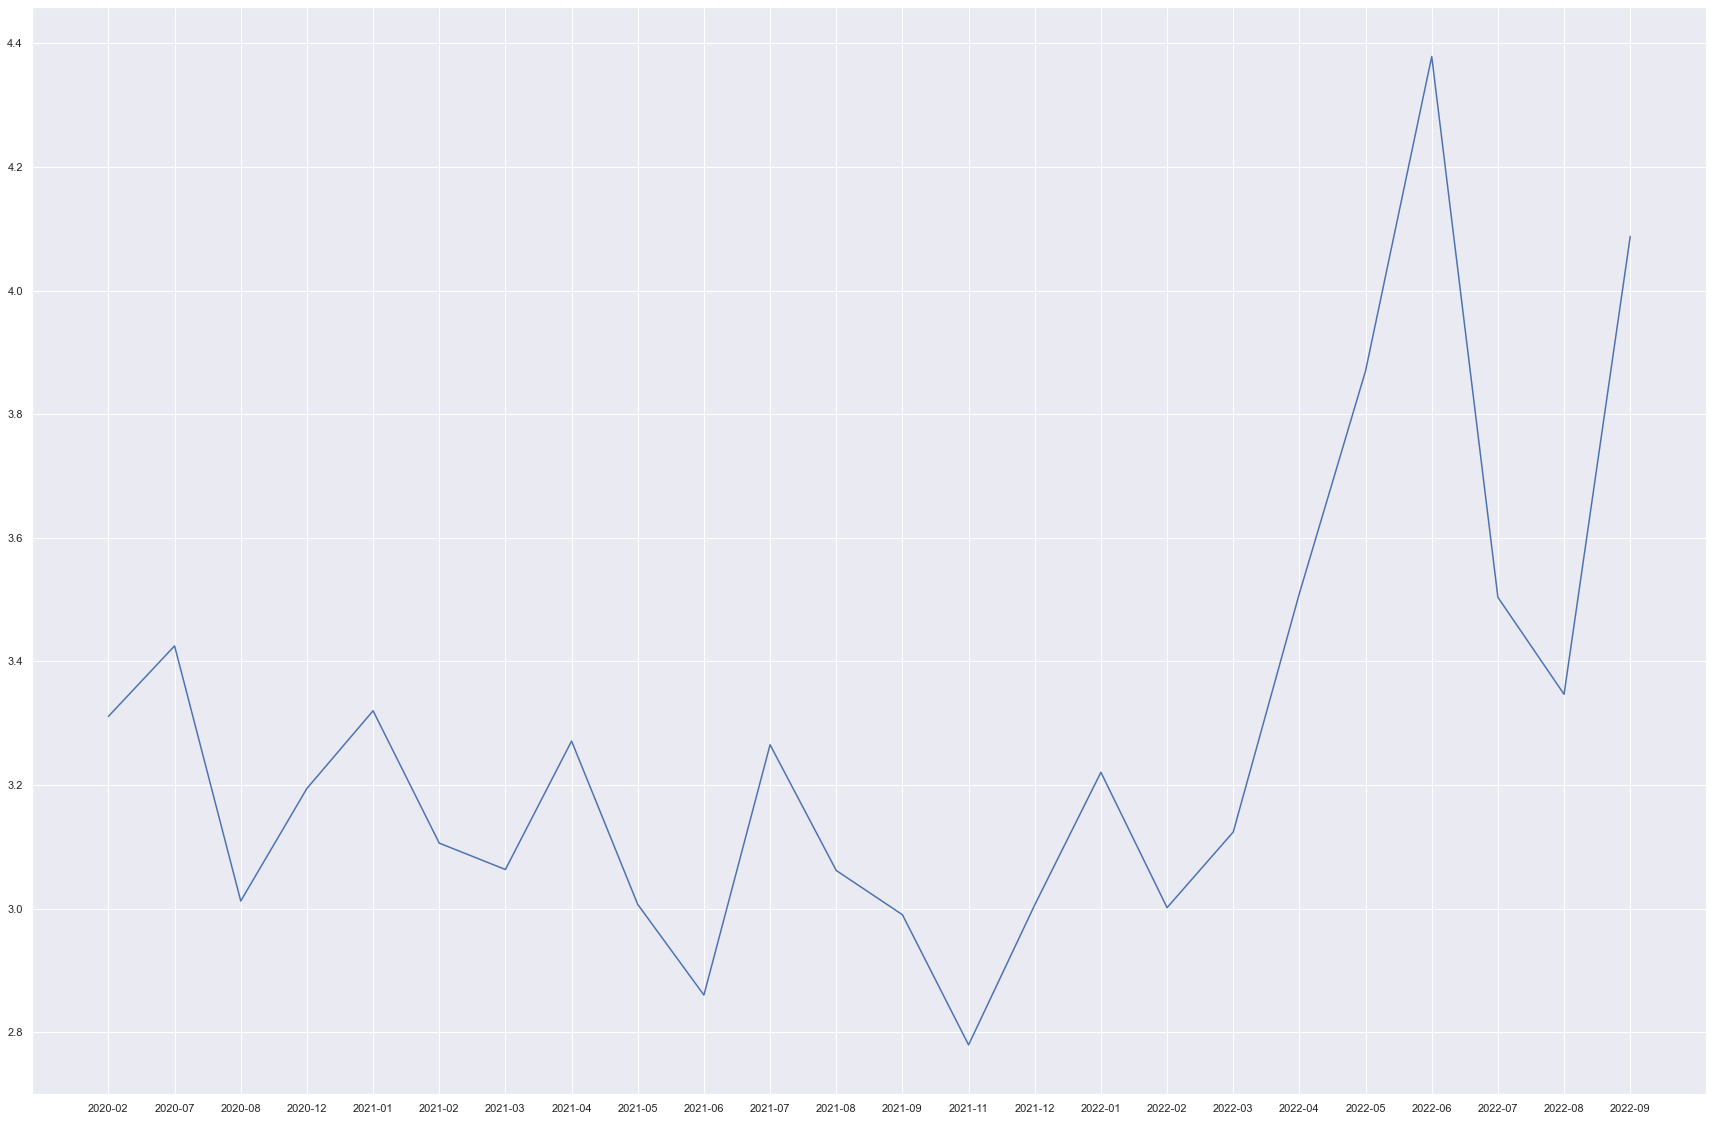

In [50]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(x=list(post_scoring_rate_aves.keys()), y=list(post_scoring_rate_aves.values()))

In [8]:
pre_scoring_rates_year, post_scoring_rates_year = extract_scoring_rates(pre_tests, post_tests, period='year')

In [9]:
pre_scoring_rate_aves_y = {}
for date in pre_scoring_rates_year:
    try:
        temp_soring_rates = []
        for rate in pre_scoring_rates_year[date][0]:
            if rate:
                temp_soring_rates.append(float(rate))
        pre_scoring_rate_aves_y[date] = sum(temp_soring_rates)/len(temp_soring_rates)
    except:
        print(date)
        print(pre_scoring_rates_year[date][0])

In [10]:
post_scoring_rate_aves_y = {}
for date in post_scoring_rates_year:
    print(date)
    try:
        temp_soring_rates = []
        for rate in post_scoring_rates_year[date][0]:
            if rate:
                temp_soring_rates.append(float(rate))
        post_scoring_rate_aves_y[date] = sum(temp_soring_rates)/len(temp_soring_rates)
    except:
        print(date)
        print(post_scoring_rates_year[date][0])

2020
2021
2022


In [11]:
post_scoring_rate_aves_y

{'2020': 3.2398113207547174,
 '2021': 3.0673053892215547,
 '2022': 3.5060330578512393}

<AxesSubplot:>

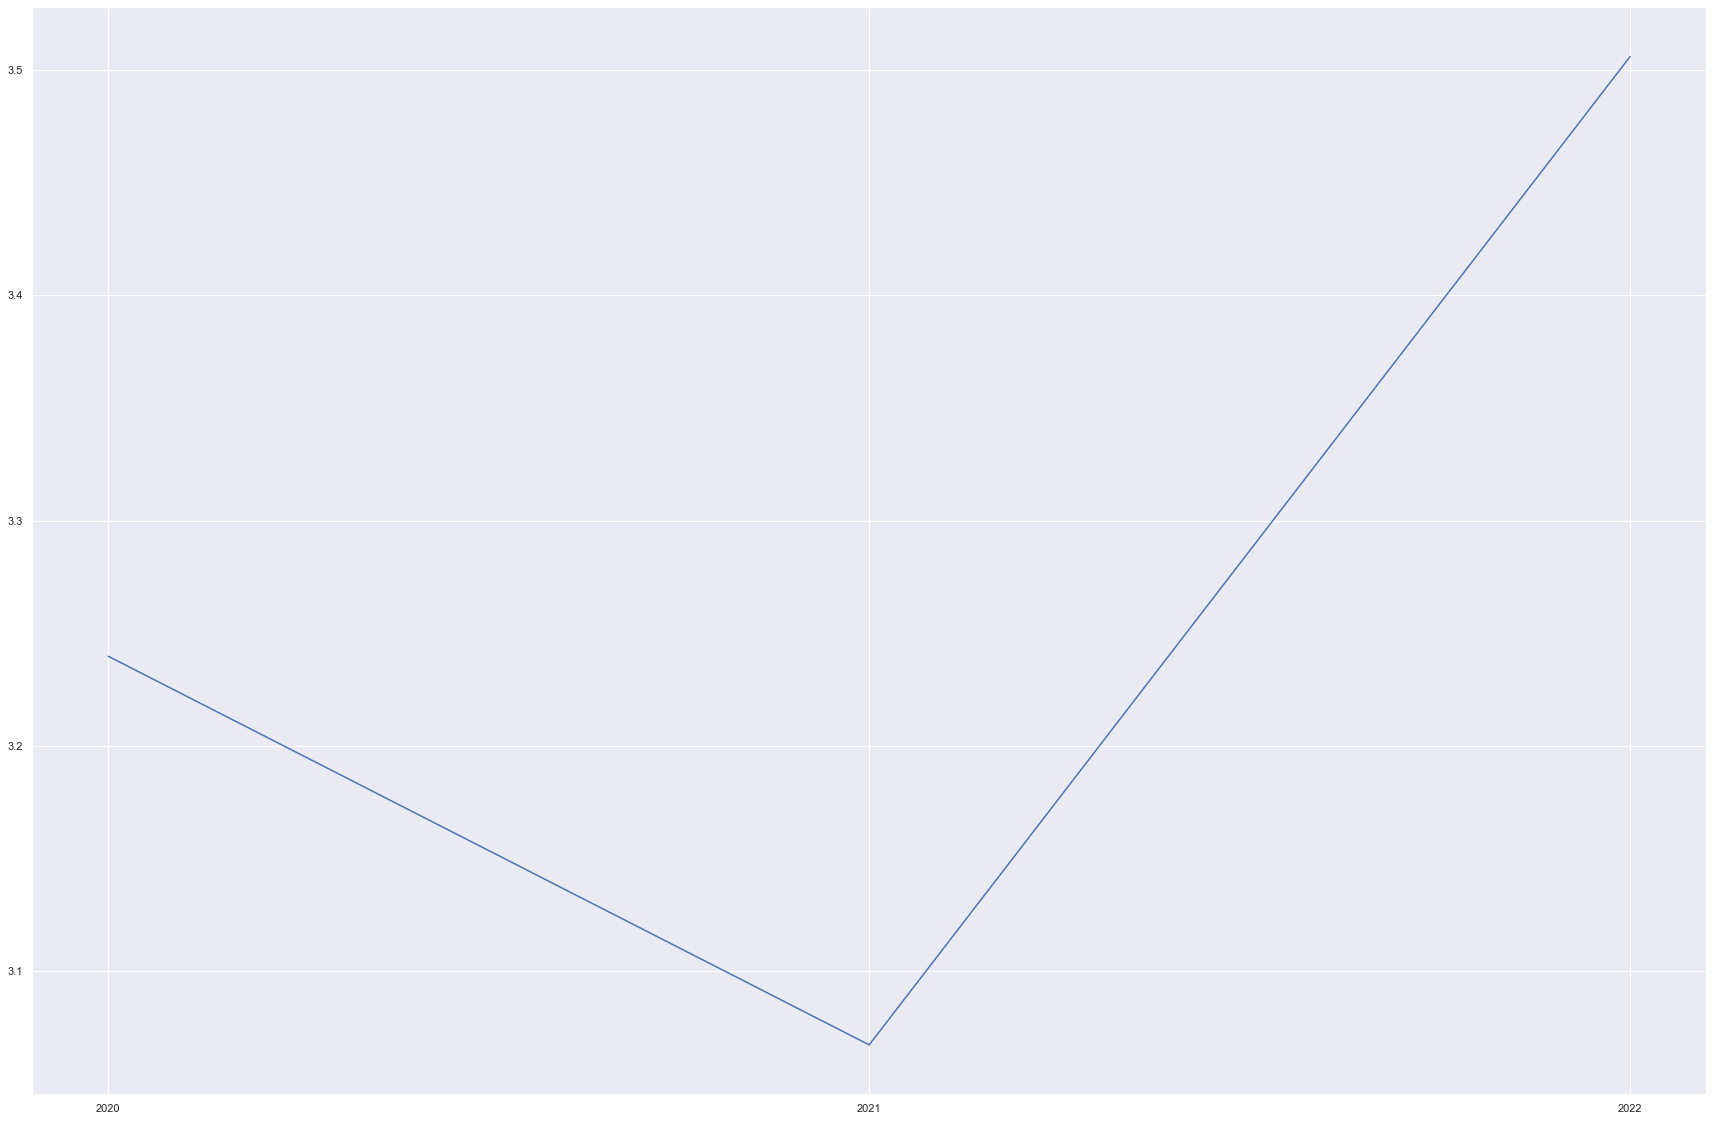

In [69]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(x=list(post_scoring_rate_aves_y.keys()), y=list(post_scoring_rate_aves_y.values()))

<AxesSubplot:>

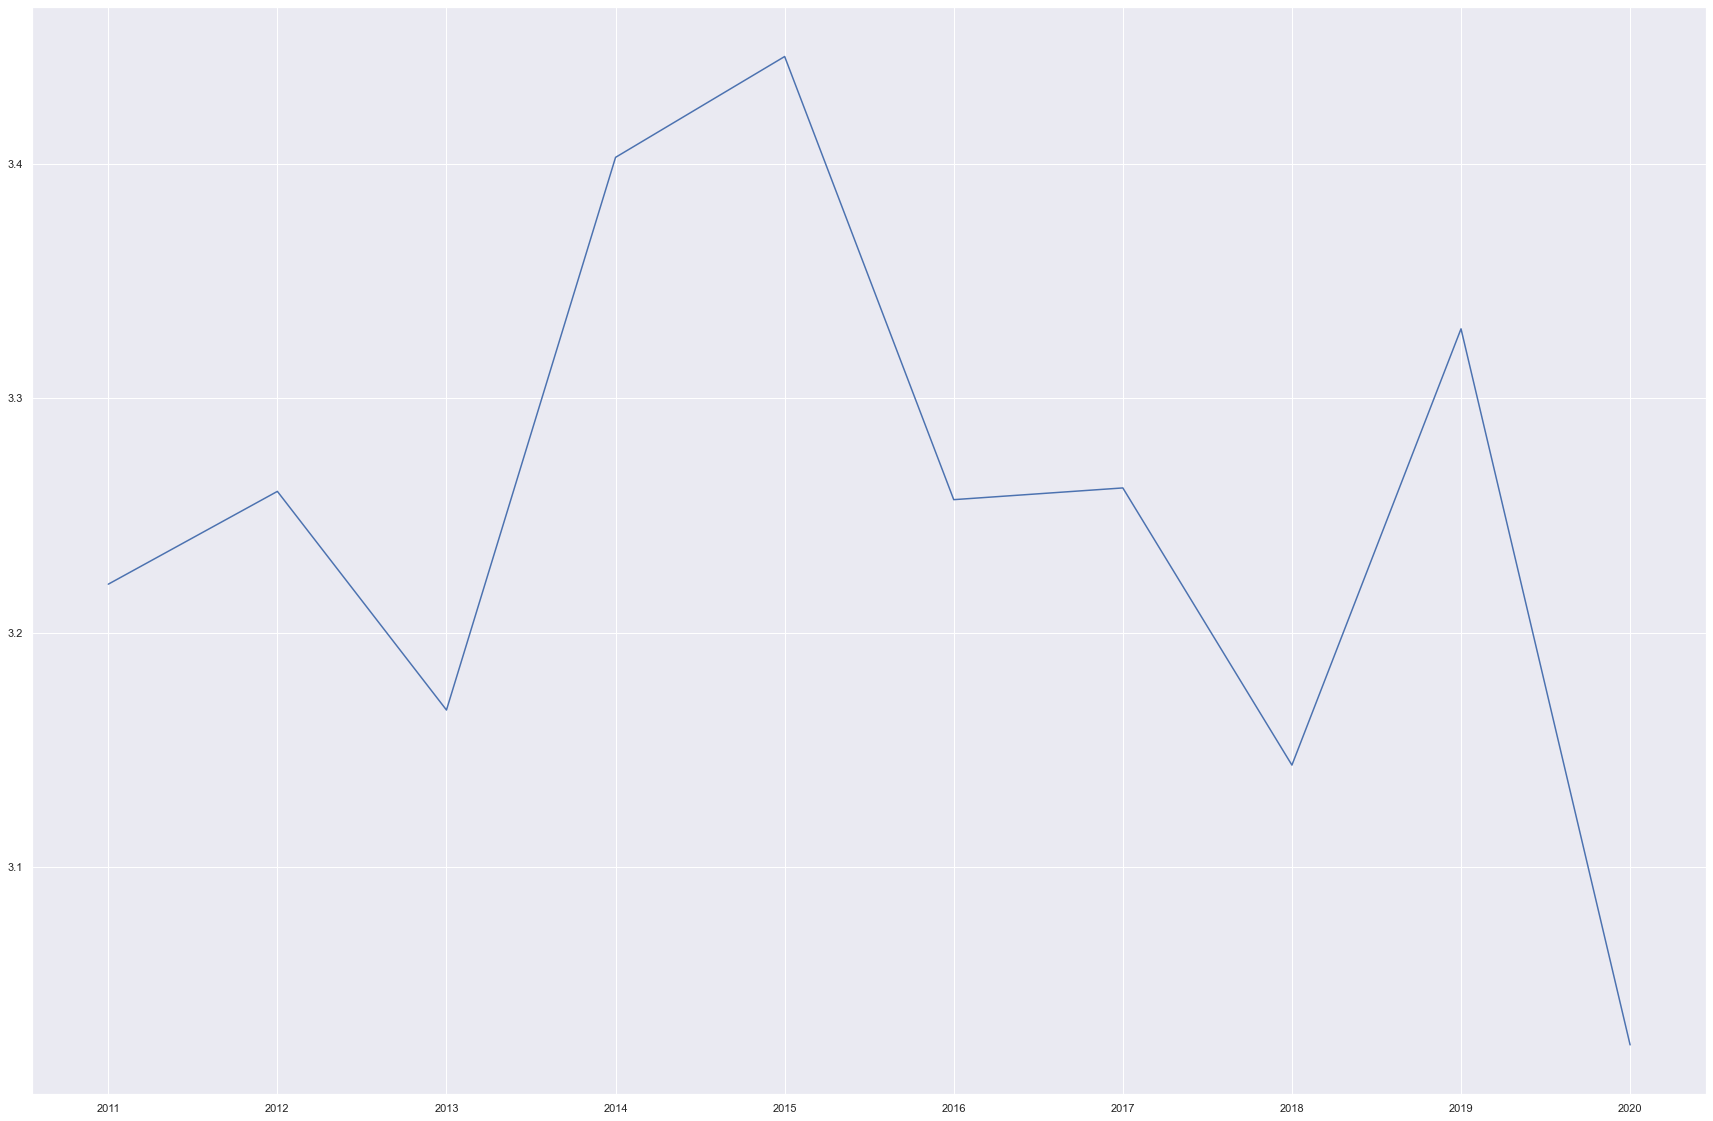

In [70]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(x=list(pre_scoring_rate_aves_y.keys()), y=list(pre_scoring_rate_aves_y.values()))

In [11]:
df_dict = {}
for year in sorted(list(set(list(pre_scoring_rate_aves_y.keys())+list(post_scoring_rate_aves_y.keys())))):
    row = {}
    try:
        row['pre'] = pre_scoring_rate_aves_y[year]
    except KeyError:
        row['pre'] = None

    try:
        row['post'] = post_scoring_rate_aves_y[year]
    except KeyError:
        row['post'] = None
    
    df_dict[year] = row

In [12]:
df_scoring_rates = pd.DataFrame(df_dict)

In [13]:
df_scoring_rates = df_scoring_rates.T

In [17]:
from math import isnan


isnan((df_scoring_rates.post.to_list()[0]))

True

<AxesSubplot:>

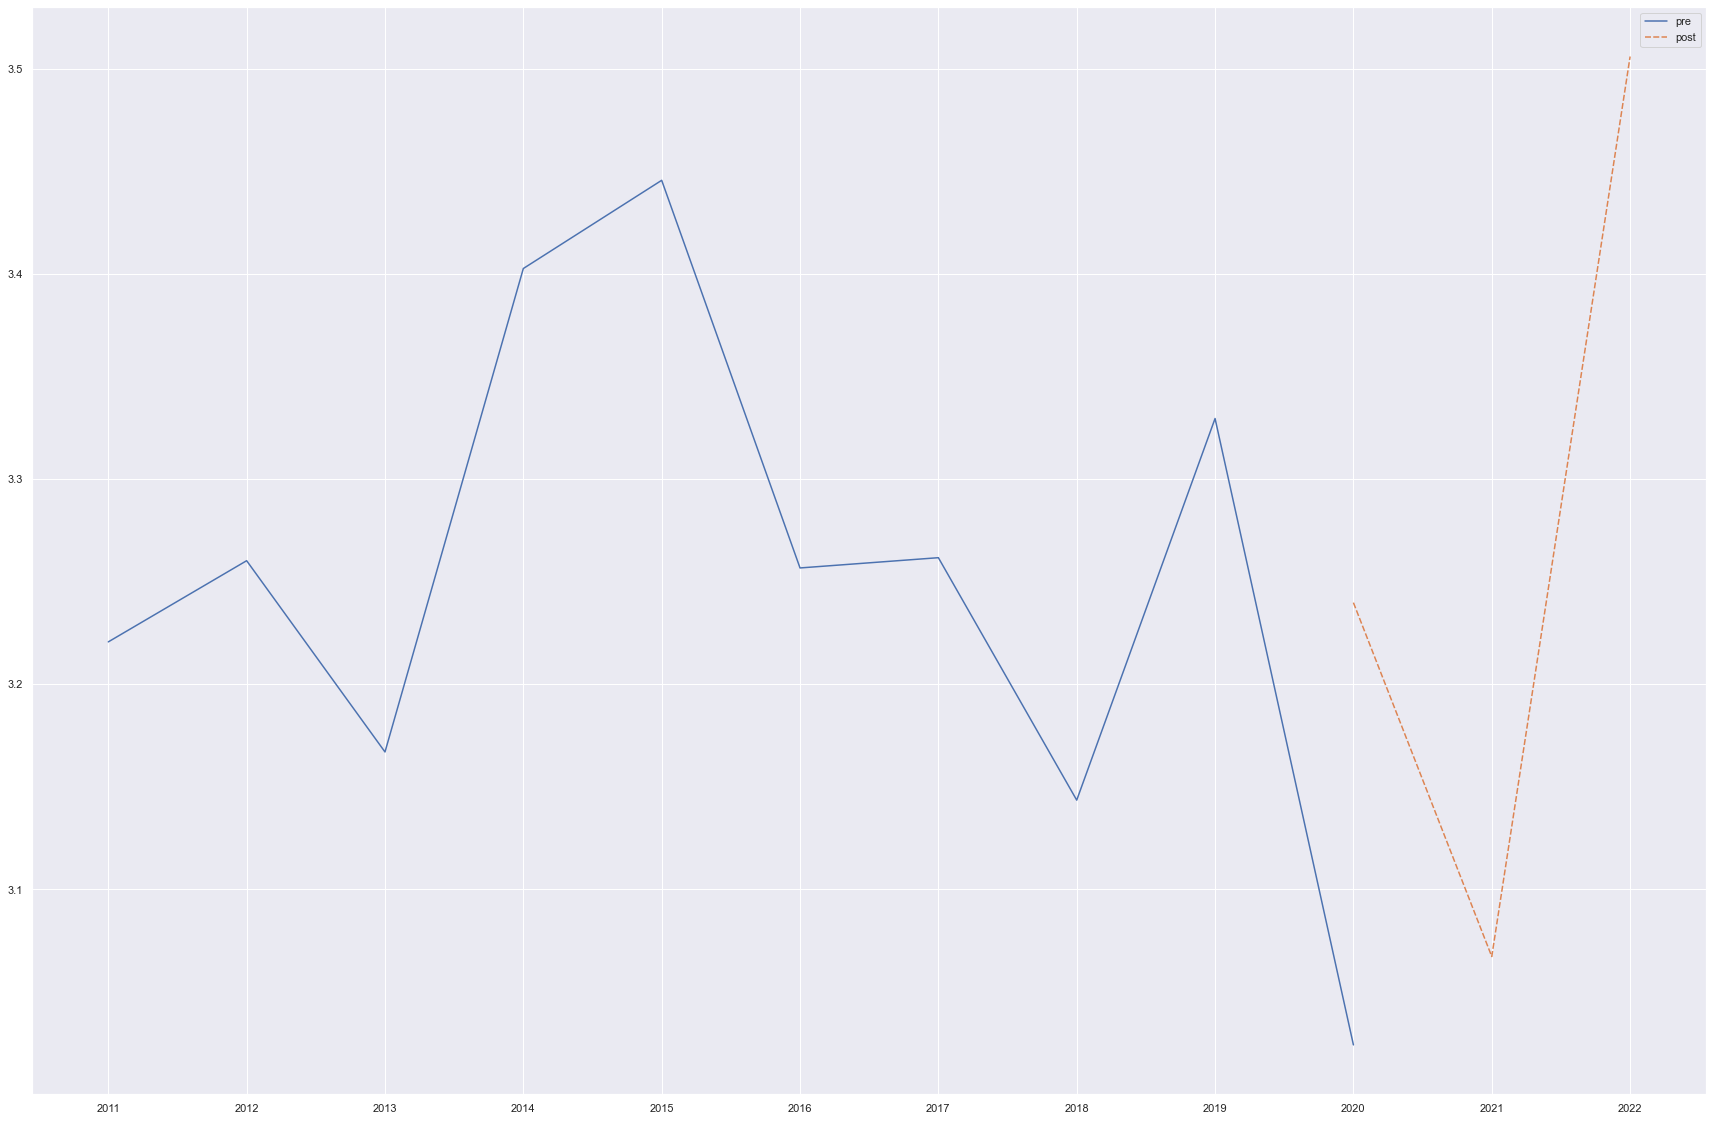

In [90]:
sns.set(rc={'figure.figsize':(30,20)})
sns.lineplot(data=df_scoring_rates)

Basically, scoring rates have not changed. So Kohli's scoring is down but scoring rates in test are not really down, nor is Kohli's cover drive frequency. So the only thing that is really changed is that Kohli must be scoring less from other shots, and Kohli also must be forcing cover drives to unsuitable deliveries. So lets find out how Kohli's strike rate has probably gone down for other deliveries. Goal for today: Get flick shot analysis like was done for cover drives